# Generative Models as Data Augmentation in the Medical Domain

## 1. Overview

This project tries to evaluate the quality of generative models for data augmentation in the medical domain. 

Data augmentation will be relying on geometric data augmentation, (variational) auto-encoder (e.g. stacked denoising, denoising auto-encoder, etc.), and generative adversarial neural networks (e.g. GAN, DCGAN, Wasserstein GAN, etc.) for instance.

We will restrict ourself to three kind of models to generate new data and evaluate the (possible) improvement with regards to a final classification score (i.e. comparing results between augmented and non-augmented training sets). 

### Datasets

We will look into applying the above project on some (if not all) of the following datasets from the MedMNIST Classification Decathlon (https://medmnist.github.io/):

| Dataset | Classification Type | Train size | Validation size | Test size |
| :--- | :--- | :---: | :---: | :---: |  
| PathMNIST Pathology | Multi-Class (9) | 89,996 | 10,004 | 7,180 |
| DermaMNIST Dermatoscope | Multi-Class (7) | 7,007 | 1,003 | 2,005 |
| OctMNIST | Multi-Class (4) | 97,477 | 10,832 | 1,000 |
| PneumoniaMNIST Chest X-ray | Binary-Class (2) |4,708 | 524 | 624 |
| BreastMNIST Breast Ultrasound | Binary-Class (2) | 546 | 78 | 156 |
| OrganMNIST_Axial Abdominal CT | Multi-Class (11) | 34,581 | 6,491 | 17,778 |
| OragnMNIST_Coronal Abdominal CT | Multi-Class (11) |13,000 | 2,392 | 8,268 |
| OrganMNIST_Sagittal Abdominal CT | Multi-Class (11) | 13,940 | 2,452 | 8,829 |

### Notes

We will also provide a short report (in copy) explaining the choice of VAE, AE, and/or GAN models, outlining differences between datasets' results. We will also try to interprete and justify possible differences with regards to models, data specifications, visual features, and bibliography references used to support the choices made.

## 2. Data imports, Library Imports, and other preliminary declarations

### Source

We will retrieve the above dataset from the following website:

> [MedMNIST v2: A Large-Scale Lightweight Benchmark for 2D and 3D Biomedical Image Classification](https://medmnist.com/), Jiancheng Yang,Rui Shi,Donglai Wei,Zequan Liu,Lin Zhao,Bilian Ke,Hanspeter Pfister,Bingbing Ni

By following the instructions on their [github](https://github.com/MedMNIST/MedMNIST), we can download their ready-made module with the following instruction:

```sh
pip install jupyter, ipywidgets, IProgress
pip install medmnist
```

And load it in a python or ipython instance:

```python
import medmnist
```

### Library Imports

In [1]:
from python_scripts.classifier import run_classifier_pipeline
from python_scripts.variational_autoencoders import run_encoder_pipeline, one_hot
from python_scripts.generative_adversarial_networks import run_GAN_pipeline
from python_scripts.data import retrieve_flag_info, import_dataset
from python_scripts.data import check_cuda_availability
from python_scripts.data import generate_augmented_dataset_condVAE
from python_scripts.data import generate_augmented_dataset_jointVAE
from python_scripts.data import generate_augmented_dataset_condGAN

import os
import warnings
warnings.filterwarnings('ignore')

### Checks CUDA availability

In [2]:
check_cuda_availability()

True,0,<torch.cuda.device object at 0x7f7b0afcefa0>,1
NVIDIA GeForce GTX 980 Ti


### Data Imports

We import the datasets in four manners:

| import # | with WSR | with Geometric DA | Application | Other transformation | 
| --- | --- | --- | --- | --- |
| 1 | No | No | To test the baseline classifier |  No | 
| 2 | Yes | No | To test the baseline classifier and train the VAE |  No | 
| 3 | Yes | No | To train the GAN |  Iimage upscale to 32x32* | 
| 4 | Yes | Yes | To test the baseline classifier |  No | 

\* Images are upscaled to 32 pixels by 32 pixels in size in order to work with TorchFusion's implementation of a GAN.


In [3]:
data_flags = ["pathmnist", "dermamnist", "octmnist", "pneumoniamnist", 
              "breastmnist", "organamnist", "organcmnist", "organsmnist"]

info_flags = {flag:retrieve_flag_info(flag) for flag in data_flags}

Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Montage of randomly extracted images from the dataset:


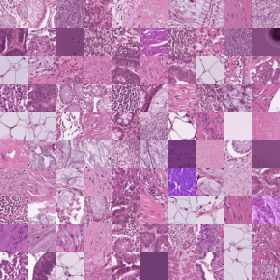

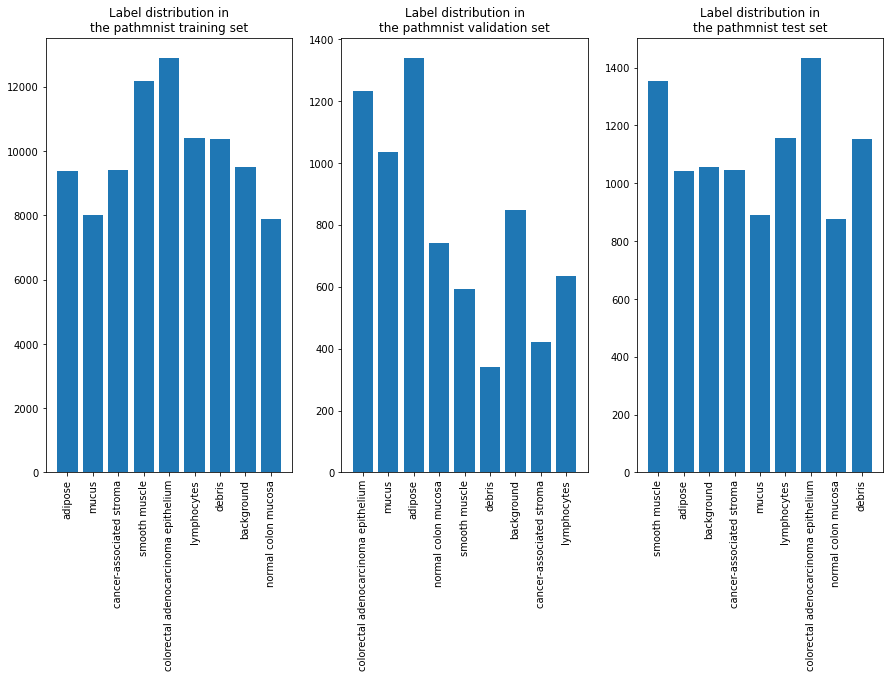

Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pathmnist.npz


In [4]:
pathmnist_noWRS_noGDA = import_dataset(
    "pathmnist", info_flags, print_visualization=True
)
pathmnist_noGDA = import_dataset(
    "pathmnist", info_flags, sampler=True
)
pathmnist_WSR_GDA = import_dataset(
    "pathmnist", info_flags, sampler=True, geometric_augment=3
)
# To be used for the GAN training
pathmnist_noWRS_noGDA_upscaled = import_dataset(
    "pathmnist", info_flags, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Montage of randomly extracted images from the dataset:


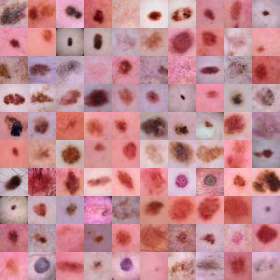

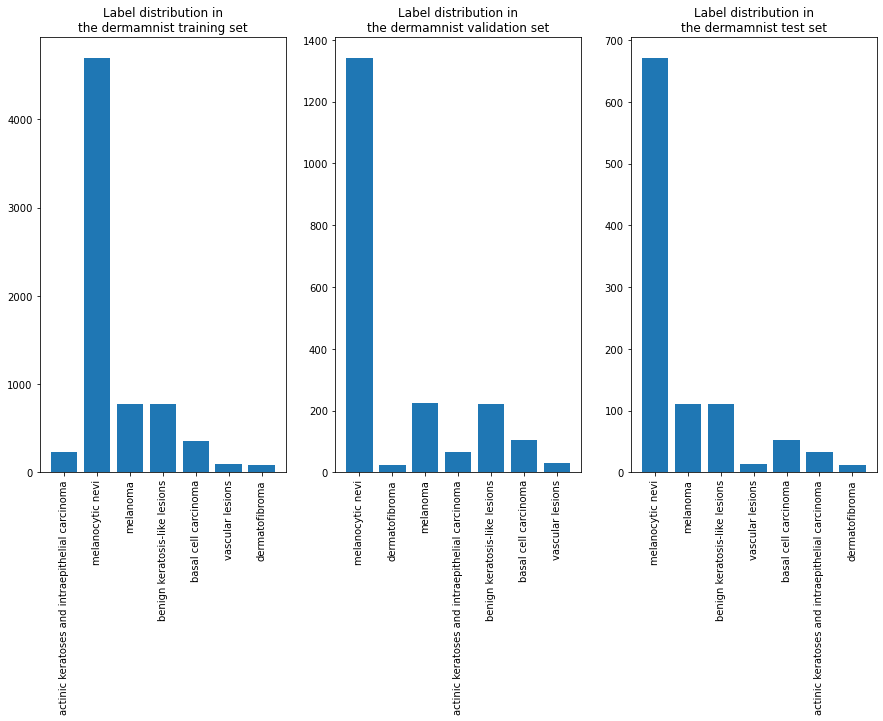

Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/dermamnist.npz


In [5]:
dermamnist_noWRS_noGDA = import_dataset(
    "dermamnist", info_flags, print_visualization=True
)
dermamnist_noGDA = import_dataset(
    "dermamnist", info_flags, sampler=True
)
dermamnist_WSR_GDA = import_dataset(
    "dermamnist", info_flags, sampler=True, geometric_augment=3
)
# To be used for the GAN training
dermamnist_noGDA_upscaled = import_dataset(
    "dermamnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Montage of randomly extracted images from the dataset:


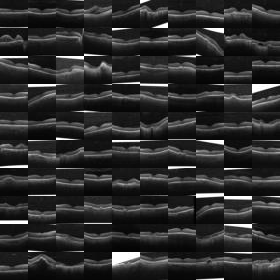

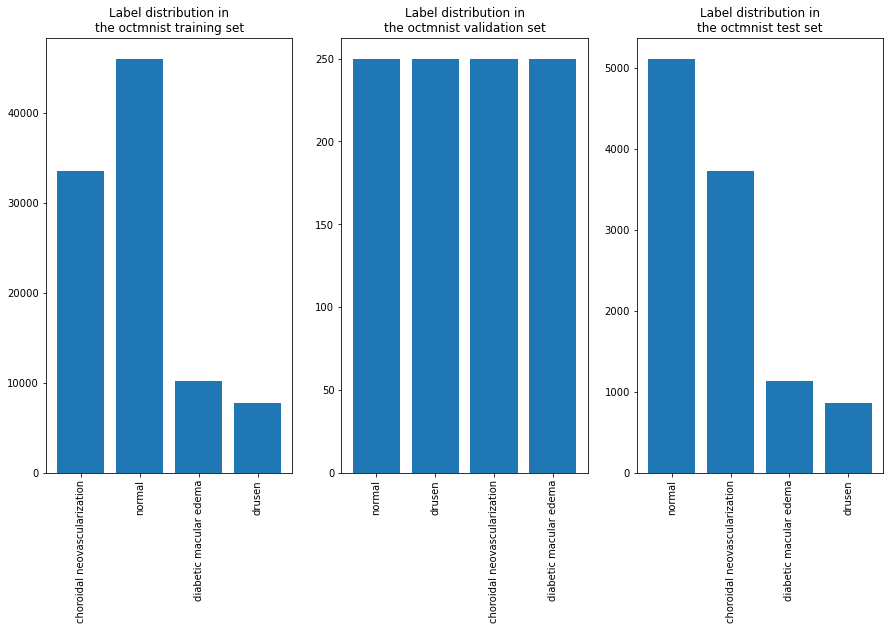

Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/octmnist.npz


In [6]:
octmnist_noWRS_noGDA = import_dataset(
    "octmnist", info_flags, print_visualization=True
)
octmnist_noGDA = import_dataset(
    "octmnist", info_flags, sampler=True
)
octmnist_WSR_GDA = import_dataset(
    "octmnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
octmnist_noGDA_upscaled = import_dataset(
    "octmnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Montage of randomly extracted images from the dataset:


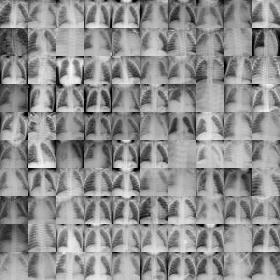

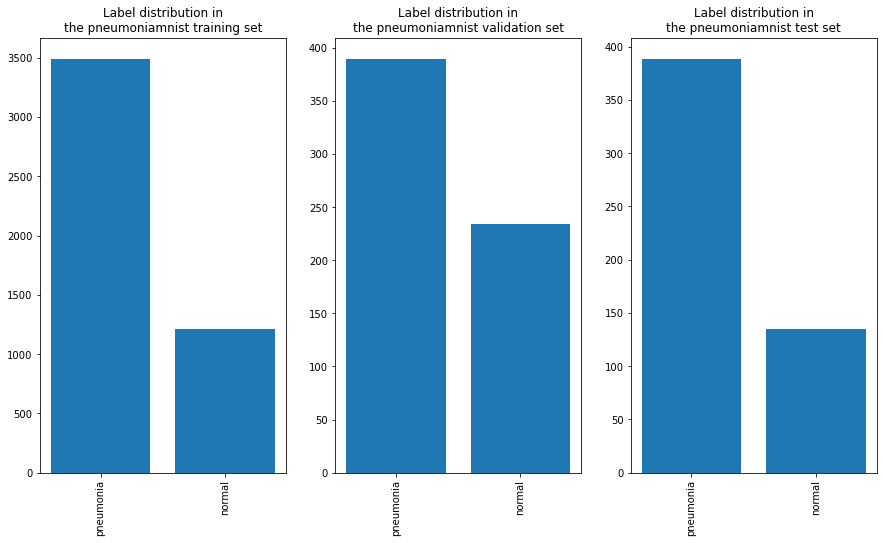

Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/pneumoniamnist.npz


In [7]:
pneumoniamnist_noWRS_noGDA = import_dataset(
    "pneumoniamnist", info_flags, print_visualization=True
)
pneumoniamnist_noGDA = import_dataset(
    "pneumoniamnist", info_flags, sampler=True
)
pneumoniamnist_WSR_GDA = import_dataset(
    "pneumoniamnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
pneumoniamnist_noGDA_upscaled = import_dataset(
    "pneumoniamnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Montage of randomly extracted images from the dataset:


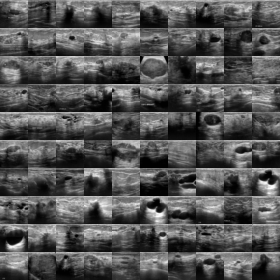

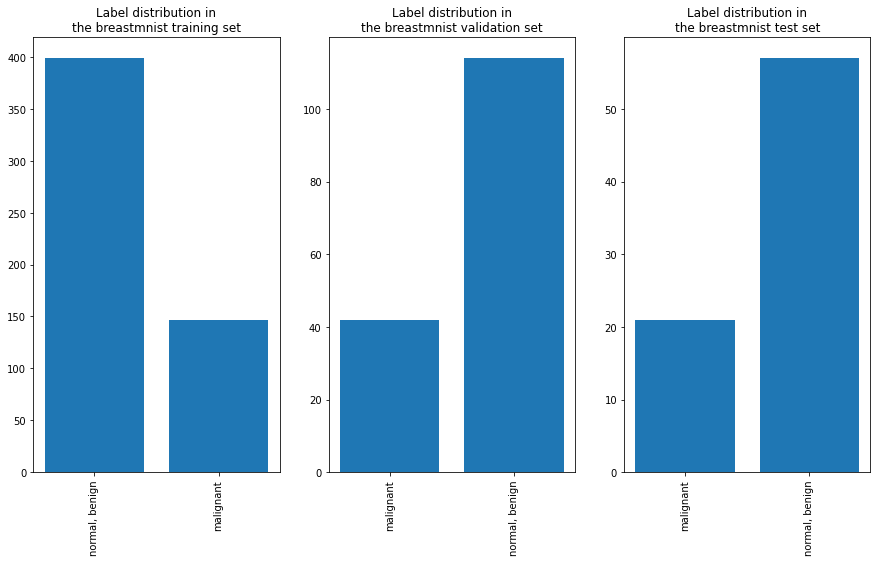

Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/breastmnist.npz


In [45]:
breastmnist_noWRS_noGDA = import_dataset(
    "breastmnist", info_flags, print_visualization=True
)
breastmnist_noGDA = import_dataset(
    "breastmnist", info_flags, sampler=True
)
breastmnist_WSR_GDA = import_dataset(
    "breastmnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
breastmnist_noGDA_upscaled = import_dataset(
    "breastmnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Montage of randomly extracted images from the dataset:


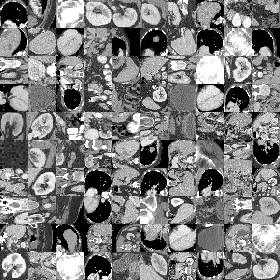

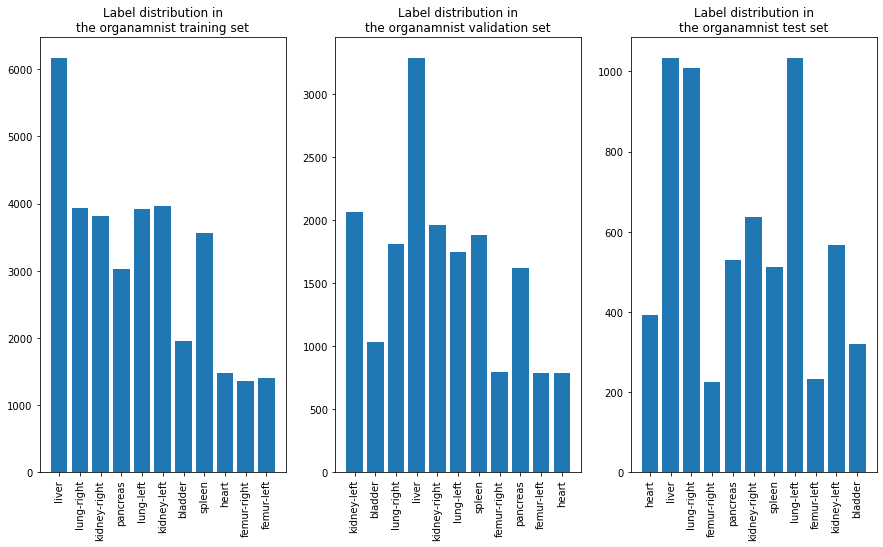

Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organamnist.npz


In [44]:
organamnist_noWRS_noGDA = import_dataset(
    "organamnist", info_flags, print_visualization=True
)
organamnist_noGDA = import_dataset(
    "organamnist", info_flags, sampler=True
)
organamnist_WSR_GDA = import_dataset(
    "organamnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
organamnist_noGDA_upscaled = import_dataset(
    "organamnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Montage of randomly extracted images from the dataset:


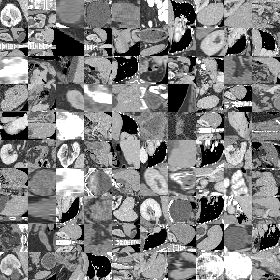

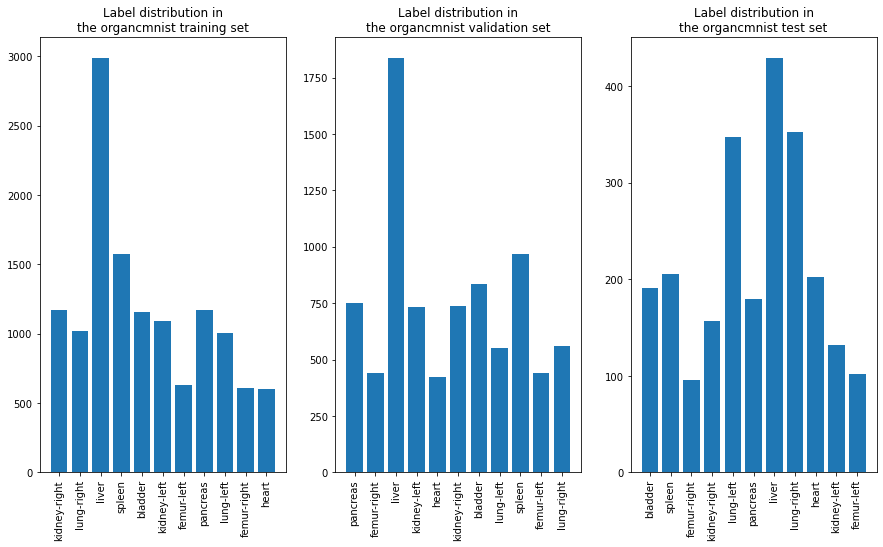

Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organcmnist.npz


In [43]:
organcmnist_noWRS_noGDA = import_dataset(
    "organcmnist", info_flags, print_visualization=True
)
organcmnist_noGDA = import_dataset(
    "organcmnist", info_flags, sampler=True
)
organcmnist_WSR_GDA = import_dataset(
    "organcmnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
organcmnist_noGDA_upscaled = import_dataset(
    "organcmnist", info_flags, sampler=True, upscale=True
)

Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Montage of randomly extracted images from the dataset:


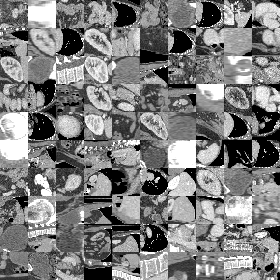

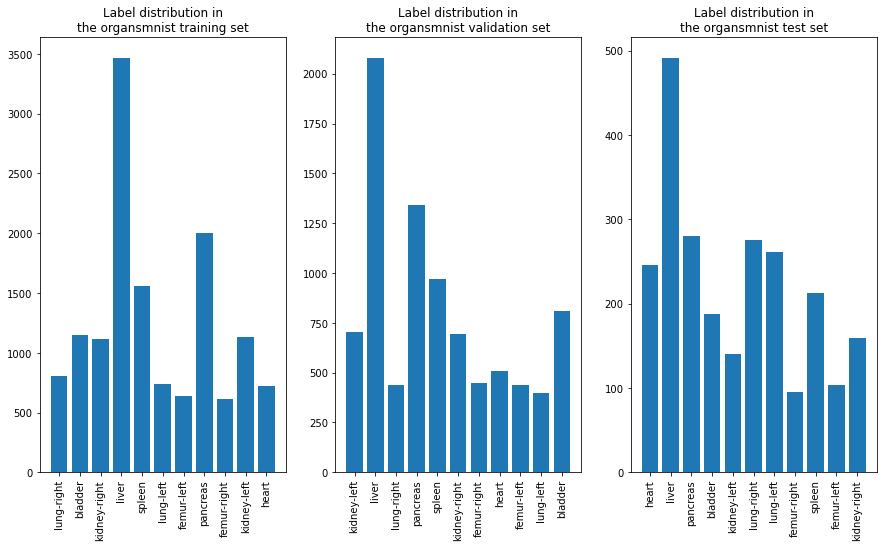

Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz
Using downloaded and verified file: /home/quentin/.medmnist/organsmnist.npz


In [41]:
organsmnist_noWRS_noGDA = import_dataset(
    "organsmnist", info_flags, print_visualization=True
)
organsmnist_noGDA = import_dataset(
    "organsmnist", info_flags, sampler=True
)
organsmnist_WSR_GDA = import_dataset(
    "organsmnist", info_flags, sampler=True, geometric_augment=2
)
# To be used for the GAN training
organsmnist_noGDA_upscaled = import_dataset(
    "organsmnist", info_flags, sampler=True, upscale=True
)

## 3. Training the MedMNIST baseline classifier on dataset without Deep Learning data augmentation

Relying on the MedMNIST baseline classifier available on their github and repurposed for this notebook, we will train it on three variants of the datasets as listed in the previous section:

- Without geometric data augmentation and without weighted random sampling (the data is simply shuffled)
- With weighted random sampling and without geometric data augmentation
- With both geometric data augmentation and weighted random sampling

### 3.1. Training on the MedMNIST datasets without GDA and WSR

In [12]:
# Declares the baseline setup to save the related model
DA_technique="_noWRS_noGDA"

#### PathMNIST

{
  "python_class": "PathMNIST",
  "description": "The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3\u00d7224\u00d7224 into 3\u00d728\u00d728, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/pathmnist.npz?download=1",
  "MD5": "a8b06965200029087d5bd730944a56c1",
  "task": "multi-class",
  "label": {
    "0": "adipose",
    "1": "background",
    "2": "debris",
    "3": "lymphocytes",
    "4": "mucus",
    "5": "smooth muscle",
    "6": "normal colon mucosa"

100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 35.87it/s]


train -- accuracy: 0.61
val -- accuracy: 0.96,  AUC: 0.64
Epoch 1



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.92it/s]


train -- accuracy: 0.8
val -- accuracy: 0.98,  AUC: 0.82
Epoch 2



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.47it/s]


train -- accuracy: 0.85
val -- accuracy: 0.98,  AUC: 0.83
Epoch 3



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.72it/s]


train -- accuracy: 0.88
val -- accuracy: 0.98,  AUC: 0.78
Epoch 4



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.48it/s]


train -- accuracy: 0.89
val -- accuracy: 0.99,  AUC: 0.89
Epoch 5



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.53it/s]


train -- accuracy: 0.91
val -- accuracy: 0.99,  AUC: 0.87
Epoch 6



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.36it/s]


train -- accuracy: 0.92
val -- accuracy: 0.98,  AUC: 0.8
Epoch 7



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.62it/s]


train -- accuracy: 0.92
val -- accuracy: 0.99,  AUC: 0.91
Epoch 8



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.34it/s]


train -- accuracy: 0.93
val -- accuracy: 1.0,  AUC: 0.91
Epoch 9



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.68it/s]


train -- accuracy: 0.93
val -- accuracy: 0.99,  AUC: 0.84
Epoch 10



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.40it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.9
Epoch 11



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.62it/s]


train -- accuracy: 0.94
val -- accuracy: 0.99,  AUC: 0.86
Epoch 12



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.62it/s]


train -- accuracy: 0.95
val -- accuracy: 0.99,  AUC: 0.84
Epoch 13



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.59it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.93
Epoch 14



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.60it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.93
Epoch 15



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.38it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.91
Epoch 16



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.68it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.92
Epoch 17



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.39it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.93
Epoch 18



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.65it/s]


train -- accuracy: 0.97
val -- accuracy: 0.99,  AUC: 0.9
Epoch 19



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 36.53it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.93
test -- accuracy: 0.96,  AUC: 0.81


<Figure size 720x720 with 0 Axes>

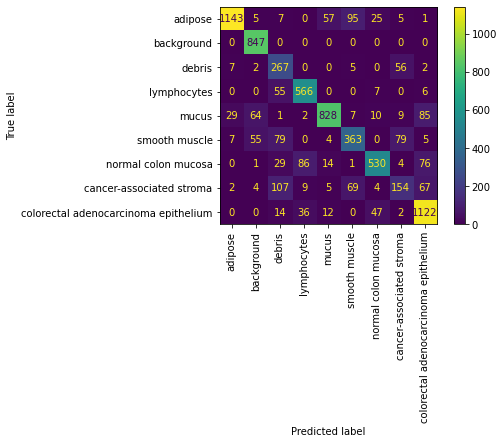

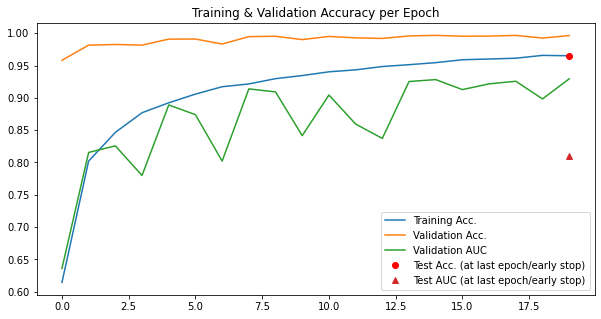

In [13]:
clf = run_classifier_pipeline(
    "pathmnist", info_flags, pathmnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### DermaMNIST

{
  "python_class": "DermaMNIST",
  "description": "The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3\u00d7600\u00d7450 are resized into 3\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/dermamnist.npz?download=1",
  "MD5": "0744692d530f8e62ec473284d019b0c7",
  "task": "multi-class",
  "label": {
    "0": "actinic keratoses and intraepithelial carcinoma",
    "1": "basal cell carcinoma",
    "2": "benign keratosis-like lesions",
    "3": "dermatofibroma",
    "4": "melanoma",
    "5": "melanocytic nevi",
    "6": "vascular lesions"
  },
  "n_channels": 3,
  "n_samples": {
    "train": 7007,
    "val": 1003,
    "test": 2005
  },
  "license": "CC B

100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.71it/s]


train -- accuracy: 0.25
val -- accuracy: 0.79,  AUC: 0.27
Epoch 1



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 37.11it/s]


train -- accuracy: 0.4
val -- accuracy: 0.84,  AUC: 0.46
Epoch 2



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.89it/s]


train -- accuracy: 0.46
val -- accuracy: 0.85,  AUC: 0.49
Epoch 3



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.97it/s]


train -- accuracy: 0.49
val -- accuracy: 0.87,  AUC: 0.52
Epoch 4



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.92it/s]


train -- accuracy: 0.53
val -- accuracy: 0.88,  AUC: 0.52
Epoch 5



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.65it/s]


train -- accuracy: 0.56
val -- accuracy: 0.89,  AUC: 0.51
Epoch 6



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.69it/s]


train -- accuracy: 0.59
val -- accuracy: 0.89,  AUC: 0.52
Epoch 7



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.73it/s]


train -- accuracy: 0.63
val -- accuracy: 0.89,  AUC: 0.52
Epoch 8



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.62it/s]


train -- accuracy: 0.66
val -- accuracy: 0.89,  AUC: 0.61
Epoch 9



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 35.30it/s]


train -- accuracy: 0.69
val -- accuracy: 0.9,  AUC: 0.62
Epoch 10



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.63it/s]


train -- accuracy: 0.74
val -- accuracy: 0.89,  AUC: 0.55
Epoch 11



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.73it/s]


train -- accuracy: 0.75
val -- accuracy: 0.9,  AUC: 0.6
Epoch 12



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.85it/s]


train -- accuracy: 0.77
val -- accuracy: 0.9,  AUC: 0.63
Epoch 13



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.75it/s]


train -- accuracy: 0.8
val -- accuracy: 0.9,  AUC: 0.55
Epoch 14



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.45it/s]


train -- accuracy: 0.81
val -- accuracy: 0.9,  AUC: 0.58
Epoch 15



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.78it/s]


train -- accuracy: 0.83
val -- accuracy: 0.91,  AUC: 0.61
Epoch 16



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.88it/s]


train -- accuracy: 0.85
val -- accuracy: 0.9,  AUC: 0.6
Epoch 17



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.62it/s]


train -- accuracy: 0.86
val -- accuracy: 0.91,  AUC: 0.66
Epoch 18



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.76it/s]


train -- accuracy: 0.87
val -- accuracy: 0.91,  AUC: 0.63
Epoch 19



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 36.53it/s]


train -- accuracy: 0.88
val -- accuracy: 0.91,  AUC: 0.71
test -- accuracy: 0.91,  AUC: 0.7


<Figure size 720x720 with 0 Axes>

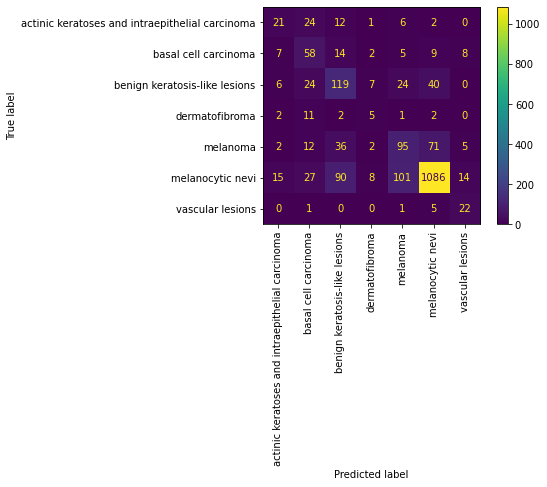

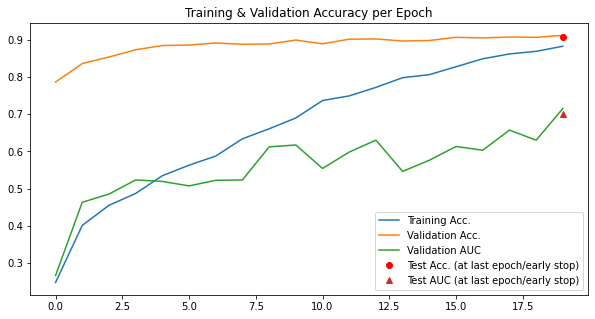

In [14]:
clf = run_classifier_pipeline(
    "dermamnist", info_flags, dermamnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### OctMNIST

{
  "python_class": "OCTMNIST",
  "description": "The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22121,536)\u00d7(277\u2212512). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/octmnist.npz?download=1",
  "MD5": "c68d92d5b585d8d81f7112f81e2d0842",
  "task": "multi-class",
  "label": {
    "0": "choroidal neovascularization",
    "1": "diabetic macular edema",
    "2": "drusen",
    "3": "normal"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 97477,
    "val": 10832,
    "test": 1000
  },
  "license": "CC BY 4.0"
}
--------------------------------

100%|█████████████████████████████████████████| 762/762 [00:18<00:00, 40.65it/s]


train -- accuracy: 0.63
val -- accuracy: 0.93,  AUC: 0.76
Epoch 1



100%|█████████████████████████████████████████| 762/762 [00:18<00:00, 40.78it/s]


train -- accuracy: 0.78
val -- accuracy: 0.94,  AUC: 0.81
Epoch 2



100%|█████████████████████████████████████████| 762/762 [00:18<00:00, 40.62it/s]


train -- accuracy: 0.82
val -- accuracy: 0.96,  AUC: 0.84
Epoch 3



100%|█████████████████████████████████████████| 762/762 [00:18<00:00, 40.84it/s]


train -- accuracy: 0.85
val -- accuracy: 0.96,  AUC: 0.75
Epoch 4



100%|█████████████████████████████████████████| 762/762 [00:18<00:00, 40.73it/s]


train -- accuracy: 0.87
val -- accuracy: 0.97,  AUC: 0.85
Epoch 5



100%|█████████████████████████████████████████| 762/762 [00:18<00:00, 40.89it/s]


train -- accuracy: 0.89
val -- accuracy: 0.96,  AUC: 0.82
Epoch 6



100%|█████████████████████████████████████████| 762/762 [00:18<00:00, 40.51it/s]


train -- accuracy: 0.9
val -- accuracy: 0.97,  AUC: 0.88
Epoch 7



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.55it/s]


train -- accuracy: 0.92
val -- accuracy: 0.96,  AUC: 0.84
Epoch 8



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.06it/s]


train -- accuracy: 0.93
val -- accuracy: 0.96,  AUC: 0.79
Epoch 9



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 38.88it/s]


train -- accuracy: 0.93
val -- accuracy: 0.96,  AUC: 0.86
Epoch 10



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.82it/s]


train -- accuracy: 0.94
val -- accuracy: 0.97,  AUC: 0.84
Epoch 11



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.97it/s]


train -- accuracy: 0.95
val -- accuracy: 0.97,  AUC: 0.89
Epoch 12



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.72it/s]


train -- accuracy: 0.95
val -- accuracy: 0.97,  AUC: 0.9
Epoch 13



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.92it/s]


train -- accuracy: 0.96
val -- accuracy: 0.97,  AUC: 0.88
Epoch 14



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.74it/s]


train -- accuracy: 0.96
val -- accuracy: 0.97,  AUC: 0.91
Epoch 15



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.09it/s]


train -- accuracy: 0.96
val -- accuracy: 0.97,  AUC: 0.9
Epoch 16



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.67it/s]


train -- accuracy: 0.97
val -- accuracy: 0.97,  AUC: 0.89
Epoch 17



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.95it/s]


train -- accuracy: 0.97
val -- accuracy: 0.97,  AUC: 0.9
Epoch 18



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.84it/s]


train -- accuracy: 0.97
val -- accuracy: 0.97,  AUC: 0.88
Epoch 19



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.92it/s]


train -- accuracy: 0.98
val -- accuracy: 0.97,  AUC: 0.9
test -- accuracy: 0.93,  AUC: 0.74


<Figure size 720x720 with 0 Axes>

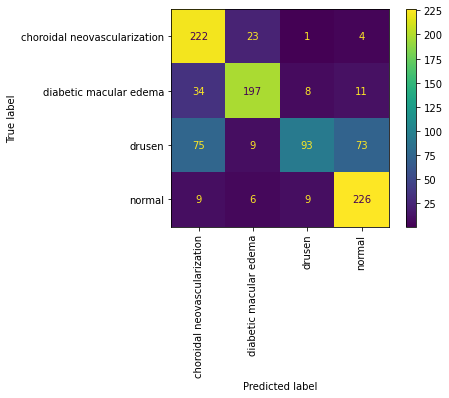

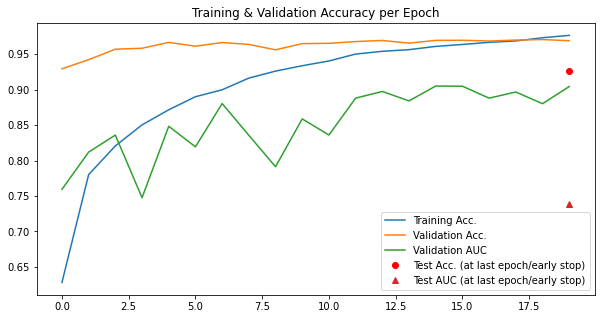

In [15]:
clf = run_classifier_pipeline(
    "octmnist", info_flags, octmnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### PneumoniaMNIST

{
  "python_class": "PneumoniaMNIST",
  "description": "The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22122,916)\u00d7(127\u22122,713). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/pneumoniamnist.npz?download=1",
  "MD5": "28209eda62fecd6e6a2d98b1501bb15f",
  "task": "binary-class",
  "label": {
    "0": "normal",
    "1": "pneumonia"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 4708,
    "val": 524,
    "test": 624
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           

100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 39.82it/s]


train -- accuracy: 0.69
val -- accuracy: 0.91,  AUC: 0.84
Epoch 1



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 39.91it/s]


train -- accuracy: 0.91
val -- accuracy: 0.97,  AUC: 0.93
Epoch 2



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 39.85it/s]


train -- accuracy: 0.94
val -- accuracy: 0.98,  AUC: 0.94
Epoch 3



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 39.96it/s]


train -- accuracy: 0.95
val -- accuracy: 0.99,  AUC: 0.95
Epoch 4



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 39.88it/s]


train -- accuracy: 0.95
val -- accuracy: 0.99,  AUC: 0.96
Epoch 5



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 40.07it/s]


train -- accuracy: 0.96
val -- accuracy: 0.99,  AUC: 0.96
Epoch 6



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 40.28it/s]


train -- accuracy: 0.97
val -- accuracy: 0.99,  AUC: 0.95
Epoch 7



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 39.77it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.95
Epoch 8



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 40.11it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.96
Epoch 9



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 40.01it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.97
Epoch 10



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 40.24it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.97
Epoch 11



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 40.08it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 12



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 39.96it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.98
Epoch 13



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 40.20it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.98
Epoch 14



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 40.26it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 15



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 40.06it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 16



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 39.90it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.98
Epoch 17



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 40.13it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.98
Epoch 18



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 40.30it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 19



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 39.84it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
test -- accuracy: 0.97,  AUC: 0.85


<Figure size 720x720 with 0 Axes>

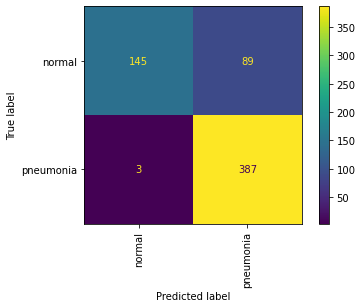

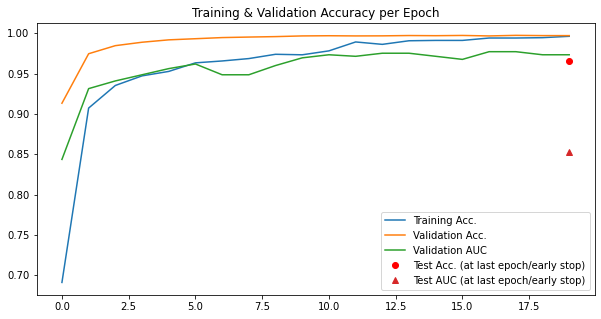

In [16]:
clf = run_classifier_pipeline(
    "pneumoniamnist", info_flags, pneumoniamnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### BreastMNIST

{
  "python_class": "BreastMNIST",
  "description": "The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1\u00d7500\u00d7500 are resized into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/breastmnist.npz?download=1",
  "MD5": "750601b1f35ba3300ea97c75c52ff8f6",
  "task": "binary-class",
  "label": {
    "0": "malignant",
    "1": "normal, benign"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 546,
    "val": 78,
    "test": 156
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
    

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.90it/s]


train -- accuracy: 0.52
val -- accuracy: 0.46,  AUC: 0.73
Epoch 1



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.50it/s]


train -- accuracy: 0.52
val -- accuracy: 0.58,  AUC: 0.73
Epoch 2



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 45.05it/s]


train -- accuracy: 0.52
val -- accuracy: 0.65,  AUC: 0.73
Epoch 3



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.18it/s]


train -- accuracy: 0.51
val -- accuracy: 0.66,  AUC: 0.73
Epoch 4



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.43it/s]


train -- accuracy: 0.56
val -- accuracy: 0.66,  AUC: 0.73
Epoch 5



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 45.67it/s]


train -- accuracy: 0.58
val -- accuracy: 0.7,  AUC: 0.72
Epoch 6



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 43.94it/s]


train -- accuracy: 0.59
val -- accuracy: 0.71,  AUC: 0.74
Epoch 7



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.85it/s]


train -- accuracy: 0.64
val -- accuracy: 0.73,  AUC: 0.78
Epoch 8



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.17it/s]


train -- accuracy: 0.73
val -- accuracy: 0.74,  AUC: 0.71
Epoch 9



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.06it/s]


train -- accuracy: 0.72
val -- accuracy: 0.74,  AUC: 0.71
Epoch 10



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.71it/s]


train -- accuracy: 0.7
val -- accuracy: 0.75,  AUC: 0.72
Epoch 11



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.69it/s]


train -- accuracy: 0.69
val -- accuracy: 0.75,  AUC: 0.72
Epoch 12



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.01it/s]


train -- accuracy: 0.75
val -- accuracy: 0.75,  AUC: 0.74
Epoch 13



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.50it/s]


train -- accuracy: 0.74
val -- accuracy: 0.76,  AUC: 0.73
Epoch 14



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.40it/s]


train -- accuracy: 0.74
val -- accuracy: 0.76,  AUC: 0.72
Epoch 15



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 46.03it/s]


train -- accuracy: 0.73
val -- accuracy: 0.76,  AUC: 0.73
Epoch 16



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 43.74it/s]


train -- accuracy: 0.72
val -- accuracy: 0.77,  AUC: 0.73
Epoch 17



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 45.01it/s]


train -- accuracy: 0.77
val -- accuracy: 0.77,  AUC: 0.73
Epoch 18



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.77it/s]


train -- accuracy: 0.74
val -- accuracy: 0.78,  AUC: 0.73
Epoch 19



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.50it/s]


train -- accuracy: 0.72
val -- accuracy: 0.79,  AUC: 0.74
test -- accuracy: 0.77,  AUC: 0.74


<Figure size 720x720 with 0 Axes>

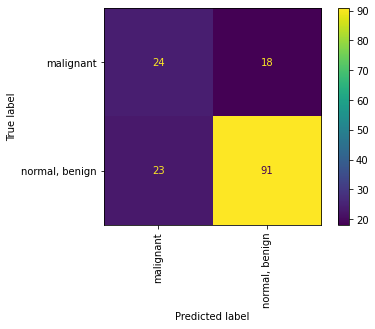

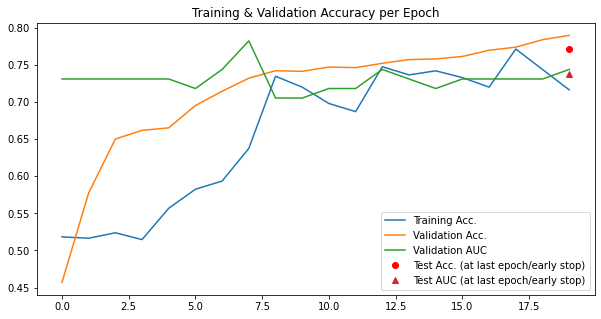

In [17]:
clf= run_classifier_pipeline(
    "breastmnist", info_flags, breastmnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### OrganAMNIST

{
  "python_class": "OrganAMNIST",
  "description": "The OrganAMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Axial (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in axial views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organamnist.npz?download=1",
  "MD5": "866b832ed4eeba67bfb9edee1d5544e6",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-left",

100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.54it/s]


train -- accuracy: 0.49
val -- accuracy: 0.97,  AUC: 0.78
Epoch 1



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 40.08it/s]


train -- accuracy: 0.79
val -- accuracy: 0.99,  AUC: 0.9
Epoch 2



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.95it/s]


train -- accuracy: 0.87
val -- accuracy: 1.0,  AUC: 0.94
Epoch 3



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.97it/s]


train -- accuracy: 0.91
val -- accuracy: 1.0,  AUC: 0.95
Epoch 4



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.49it/s]


train -- accuracy: 0.93
val -- accuracy: 1.0,  AUC: 0.95
Epoch 5



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.29it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.95
Epoch 6



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.40it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.95
Epoch 7



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.14it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.96
Epoch 8



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.32it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.95
Epoch 9



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 40.13it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.96
Epoch 10



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.23it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.96
Epoch 11



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 38.58it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 12



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.63it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.95
Epoch 13



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.42it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 14



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.93it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 15



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.58it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 16



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 40.06it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 17



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 38.86it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 18



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.52it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 19



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 38.47it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.96
test -- accuracy: 0.99,  AUC: 0.88


<Figure size 720x720 with 0 Axes>

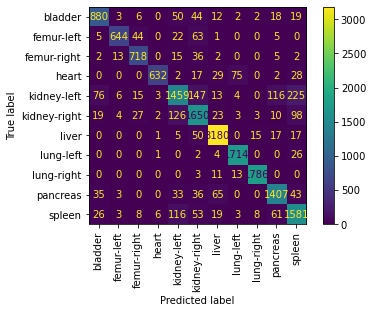

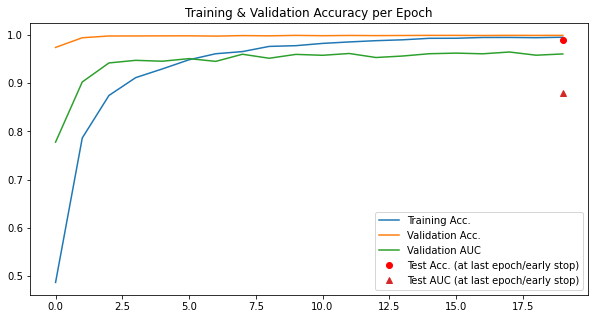

In [18]:
clf = run_classifier_pipeline(
    "organamnist", info_flags, organamnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### OrganCMNIST

{
  "python_class": "OrganCMNIST",
  "description": "The OrganCMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Coronal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in coronal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organcmnist.npz?download=1",
  "MD5": "0afa5834fb105f7705a7d93372119a21",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-le

100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 38.91it/s]


train -- accuracy: 0.32
val -- accuracy: 0.91,  AUC: 0.59
Epoch 1



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 39.23it/s]


train -- accuracy: 0.52
val -- accuracy: 0.96,  AUC: 0.74
Epoch 2



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 39.81it/s]


train -- accuracy: 0.66
val -- accuracy: 0.98,  AUC: 0.81
Epoch 3



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.83it/s]


train -- accuracy: 0.75
val -- accuracy: 0.99,  AUC: 0.87
Epoch 4



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.66it/s]


train -- accuracy: 0.8
val -- accuracy: 0.99,  AUC: 0.89
Epoch 5



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.65it/s]


train -- accuracy: 0.83
val -- accuracy: 1.0,  AUC: 0.91
Epoch 6



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.61it/s]


train -- accuracy: 0.86
val -- accuracy: 1.0,  AUC: 0.93
Epoch 7



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.75it/s]


train -- accuracy: 0.88
val -- accuracy: 1.0,  AUC: 0.94
Epoch 8



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.59it/s]


train -- accuracy: 0.89
val -- accuracy: 1.0,  AUC: 0.93
Epoch 9



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 39.47it/s]


train -- accuracy: 0.9
val -- accuracy: 1.0,  AUC: 0.94
Epoch 10



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.49it/s]


train -- accuracy: 0.91
val -- accuracy: 1.0,  AUC: 0.93
Epoch 11



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 38.03it/s]


train -- accuracy: 0.92
val -- accuracy: 1.0,  AUC: 0.94
Epoch 12



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.05it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.95
Epoch 13



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.52it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.93
Epoch 14



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.41it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.94
Epoch 15



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.38it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.95
Epoch 16



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.46it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.95
Epoch 17



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.37it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.95
Epoch 18



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.38it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.94
Epoch 19



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 40.43it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.95
test -- accuracy: 0.99,  AUC: 0.86


<Figure size 720x720 with 0 Axes>

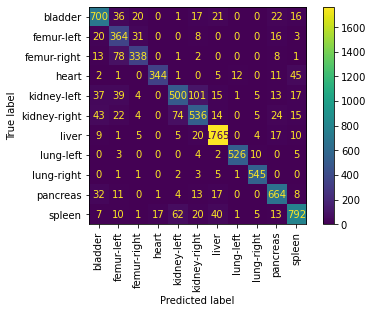

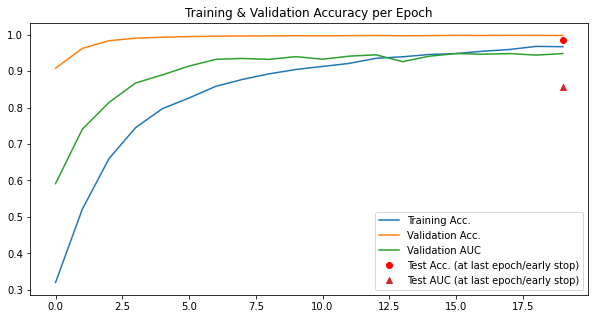

In [19]:
clf = run_classifier_pipeline(
    "organcmnist", info_flags, organcmnist_noWRS_noGDA,
    DA_technique=DA_technique
)

#### OrganSMNIST

{
  "python_class": "OrganSMNIST",
  "description": "The OrganSMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Sagittal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in sagittal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organsmnist.npz?download=1",
  "MD5": "e5c39f1af030238290b9557d9503af9d",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-

100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.44it/s]


train -- accuracy: 0.28
val -- accuracy: 0.88,  AUC: 0.43
Epoch 1



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.52it/s]


train -- accuracy: 0.39
val -- accuracy: 0.92,  AUC: 0.59
Epoch 2



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.84it/s]


train -- accuracy: 0.51
val -- accuracy: 0.96,  AUC: 0.67
Epoch 3



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 37.38it/s]


train -- accuracy: 0.6
val -- accuracy: 0.97,  AUC: 0.73
Epoch 4



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.04it/s]


train -- accuracy: 0.65
val -- accuracy: 0.98,  AUC: 0.77
Epoch 5



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.19it/s]


train -- accuracy: 0.69
val -- accuracy: 0.98,  AUC: 0.81
Epoch 6



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 38.54it/s]


train -- accuracy: 0.72
val -- accuracy: 0.98,  AUC: 0.81
Epoch 7



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.36it/s]


train -- accuracy: 0.74
val -- accuracy: 0.99,  AUC: 0.84
Epoch 8



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.66it/s]


train -- accuracy: 0.76
val -- accuracy: 0.99,  AUC: 0.83
Epoch 9



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 38.78it/s]


train -- accuracy: 0.77
val -- accuracy: 0.99,  AUC: 0.82
Epoch 10



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.10it/s]


train -- accuracy: 0.79
val -- accuracy: 0.99,  AUC: 0.83
Epoch 11



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 38.96it/s]


train -- accuracy: 0.8
val -- accuracy: 0.99,  AUC: 0.86
Epoch 12



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 38.33it/s]


train -- accuracy: 0.82
val -- accuracy: 0.99,  AUC: 0.83
Epoch 13



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.78it/s]


train -- accuracy: 0.83
val -- accuracy: 0.99,  AUC: 0.85
Epoch 14



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.76it/s]


train -- accuracy: 0.84
val -- accuracy: 0.99,  AUC: 0.86
Epoch 15



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 38.48it/s]


train -- accuracy: 0.85
val -- accuracy: 0.99,  AUC: 0.87
Epoch 16



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.83it/s]


train -- accuracy: 0.86
val -- accuracy: 0.99,  AUC: 0.84
Epoch 17



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.72it/s]


train -- accuracy: 0.86
val -- accuracy: 0.99,  AUC: 0.87
Epoch 18



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.67it/s]


train -- accuracy: 0.88
val -- accuracy: 0.99,  AUC: 0.85
Epoch 19



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.65it/s]


train -- accuracy: 0.89
val -- accuracy: 0.99,  AUC: 0.85
test -- accuracy: 0.96,  AUC: 0.71


<Figure size 720x720 with 0 Axes>

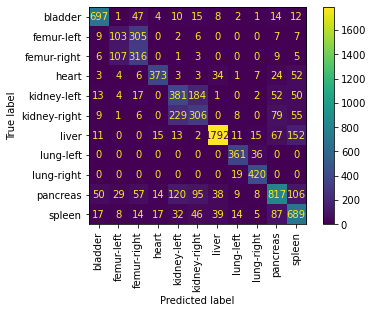

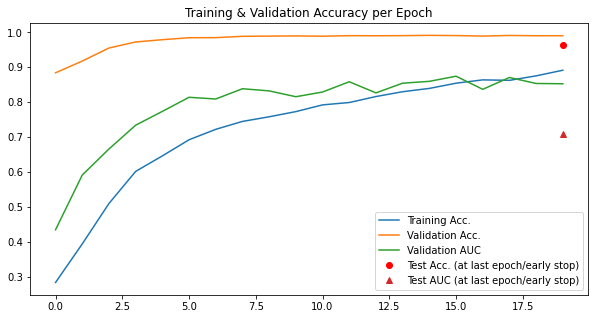

In [20]:
clf = run_classifier_pipeline(
    "organsmnist", info_flags, organsmnist_noWRS_noGDA,
    DA_technique=DA_technique
)

### 3.2. Training on the MedMNIST datasets with WSR and without GDA

In [21]:
# Declares the baseline setup to save the related model
DA_technique="_noGDA"

#### PathMNIST

{
  "python_class": "PathMNIST",
  "description": "The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3\u00d7224\u00d7224 into 3\u00d728\u00d728, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/pathmnist.npz?download=1",
  "MD5": "a8b06965200029087d5bd730944a56c1",
  "task": "multi-class",
  "label": {
    "0": "adipose",
    "1": "background",
    "2": "debris",
    "3": "lymphocytes",
    "4": "mucus",
    "5": "smooth muscle",
    "6": "normal colon mucosa"

100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 34.91it/s]


train -- accuracy: 0.6
val -- accuracy: 0.97,  AUC: 0.75
Epoch 1



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 35.15it/s]


train -- accuracy: 0.8
val -- accuracy: 0.98,  AUC: 0.82
Epoch 2



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 35.14it/s]


train -- accuracy: 0.85
val -- accuracy: 0.98,  AUC: 0.81
Epoch 3



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 35.30it/s]


train -- accuracy: 0.87
val -- accuracy: 0.99,  AUC: 0.87
Epoch 4



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 34.56it/s]


train -- accuracy: 0.89
val -- accuracy: 0.99,  AUC: 0.88
Epoch 5



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 34.54it/s]


train -- accuracy: 0.91
val -- accuracy: 0.99,  AUC: 0.9
Epoch 6



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 35.30it/s]


train -- accuracy: 0.92
val -- accuracy: 0.99,  AUC: 0.89
Epoch 7



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 35.41it/s]


train -- accuracy: 0.93
val -- accuracy: 0.99,  AUC: 0.89
Epoch 8



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 34.70it/s]


train -- accuracy: 0.93
val -- accuracy: 0.99,  AUC: 0.83
Epoch 9



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 35.00it/s]


train -- accuracy: 0.93
val -- accuracy: 0.99,  AUC: 0.87
Epoch 10



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 34.19it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.93
Epoch 11



100%|█████████████████████████████████████████| 704/704 [00:19<00:00, 35.35it/s]


train -- accuracy: 0.94
val -- accuracy: 0.99,  AUC: 0.91
Epoch 12



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 34.79it/s]


train -- accuracy: 0.95
val -- accuracy: 0.99,  AUC: 0.9
Epoch 13



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 34.93it/s]


train -- accuracy: 0.95
val -- accuracy: 0.99,  AUC: 0.9
Epoch 14



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 34.36it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.92
Epoch 15



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 34.87it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.92
Epoch 16



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 34.98it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.93
Epoch 17



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 33.92it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.94
Epoch 18



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 34.67it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.91
Epoch 19



100%|█████████████████████████████████████████| 704/704 [00:20<00:00, 33.72it/s]


train -- accuracy: 0.96
val -- accuracy: 0.99,  AUC: 0.88
test -- accuracy: 0.94,  AUC: 0.73


<Figure size 720x720 with 0 Axes>

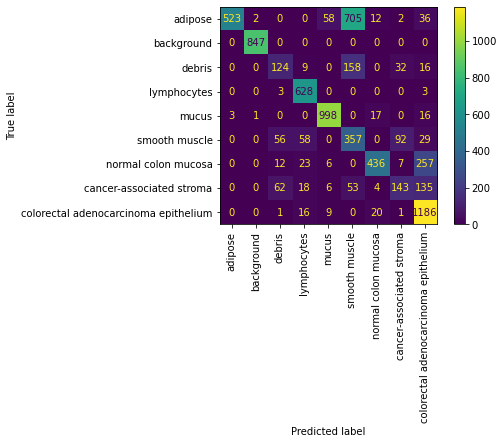

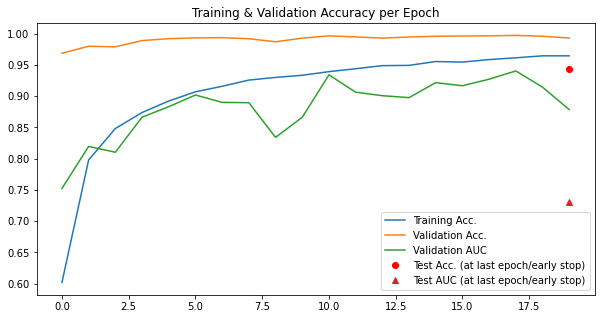

In [22]:
clf = run_classifier_pipeline(
    "pathmnist", info_flags, pathmnist_noGDA,
    DA_technique=DA_technique
)

#### DermaMNIST

{
  "python_class": "DermaMNIST",
  "description": "The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3\u00d7600\u00d7450 are resized into 3\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/dermamnist.npz?download=1",
  "MD5": "0744692d530f8e62ec473284d019b0c7",
  "task": "multi-class",
  "label": {
    "0": "actinic keratoses and intraepithelial carcinoma",
    "1": "basal cell carcinoma",
    "2": "benign keratosis-like lesions",
    "3": "dermatofibroma",
    "4": "melanoma",
    "5": "melanocytic nevi",
    "6": "vascular lesions"
  },
  "n_channels": 3,
  "n_samples": {
    "train": 7007,
    "val": 1003,
    "test": 2005
  },
  "license": "CC B

100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 34.28it/s]


train -- accuracy: 0.25
val -- accuracy: 0.76,  AUC: 0.55
Epoch 1



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 32.95it/s]


train -- accuracy: 0.36
val -- accuracy: 0.82,  AUC: 0.48
Epoch 2



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.42it/s]


train -- accuracy: 0.44
val -- accuracy: 0.85,  AUC: 0.49
Epoch 3



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 34.21it/s]


train -- accuracy: 0.51
val -- accuracy: 0.87,  AUC: 0.48
Epoch 4



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.90it/s]


train -- accuracy: 0.53
val -- accuracy: 0.87,  AUC: 0.52
Epoch 5



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.47it/s]


train -- accuracy: 0.58
val -- accuracy: 0.87,  AUC: 0.5
Epoch 6



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.17it/s]


train -- accuracy: 0.61
val -- accuracy: 0.89,  AUC: 0.55
Epoch 7



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.37it/s]


train -- accuracy: 0.64
val -- accuracy: 0.89,  AUC: 0.61
Epoch 8



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.34it/s]


train -- accuracy: 0.67
val -- accuracy: 0.88,  AUC: 0.56
Epoch 9



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.98it/s]


train -- accuracy: 0.7
val -- accuracy: 0.89,  AUC: 0.56
Epoch 10



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 31.95it/s]


train -- accuracy: 0.72
val -- accuracy: 0.9,  AUC: 0.62
Epoch 11



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.91it/s]


train -- accuracy: 0.76
val -- accuracy: 0.9,  AUC: 0.64
Epoch 12



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.06it/s]


train -- accuracy: 0.78
val -- accuracy: 0.91,  AUC: 0.61
Epoch 13



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.36it/s]


train -- accuracy: 0.8
val -- accuracy: 0.89,  AUC: 0.63
Epoch 14



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.46it/s]


train -- accuracy: 0.82
val -- accuracy: 0.91,  AUC: 0.64
Epoch 15



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 33.15it/s]


train -- accuracy: 0.85
val -- accuracy: 0.91,  AUC: 0.62
Epoch 16



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 34.29it/s]


train -- accuracy: 0.86
val -- accuracy: 0.89,  AUC: 0.62
Epoch 17



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 35.22it/s]


train -- accuracy: 0.87
val -- accuracy: 0.92,  AUC: 0.66
Epoch 18



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 32.53it/s]


train -- accuracy: 0.88
val -- accuracy: 0.89,  AUC: 0.57
Epoch 19



100%|███████████████████████████████████████████| 55/55 [00:01<00:00, 32.20it/s]


train -- accuracy: 0.89
val -- accuracy: 0.89,  AUC: 0.56
test -- accuracy: 0.89,  AUC: 0.59


<Figure size 720x720 with 0 Axes>

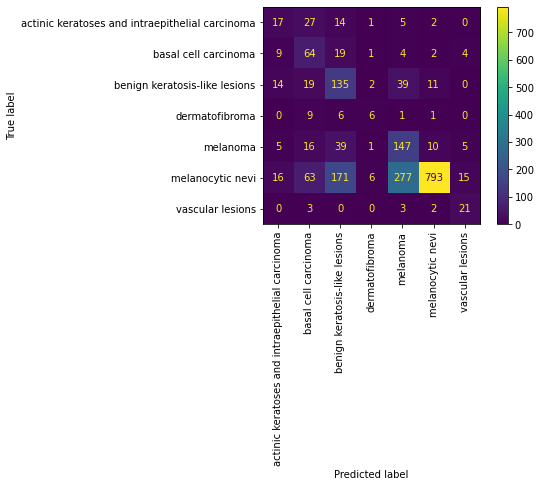

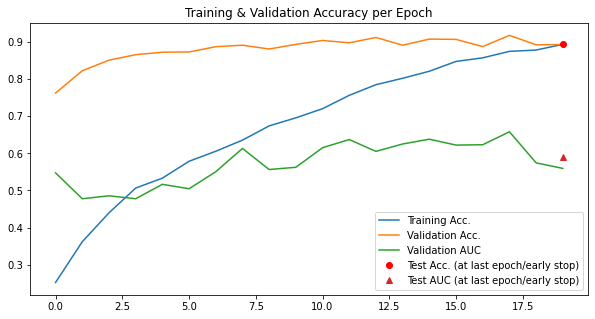

In [23]:
clf = run_classifier_pipeline(
    "dermamnist", info_flags, dermamnist_noGDA,
    DA_technique=DA_technique
)

#### OctMNIST

{
  "python_class": "OCTMNIST",
  "description": "The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22121,536)\u00d7(277\u2212512). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/octmnist.npz?download=1",
  "MD5": "c68d92d5b585d8d81f7112f81e2d0842",
  "task": "multi-class",
  "label": {
    "0": "choroidal neovascularization",
    "1": "diabetic macular edema",
    "2": "drusen",
    "3": "normal"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 97477,
    "val": 10832,
    "test": 1000
  },
  "license": "CC BY 4.0"
}
--------------------------------

100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 37.70it/s]


train -- accuracy: 0.64
val -- accuracy: 0.93,  AUC: 0.72
Epoch 1



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 38.18it/s]


train -- accuracy: 0.79
val -- accuracy: 0.94,  AUC: 0.78
Epoch 2



100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 37.83it/s]


train -- accuracy: 0.83
val -- accuracy: 0.95,  AUC: 0.72
Epoch 3



100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 37.64it/s]


train -- accuracy: 0.86
val -- accuracy: 0.96,  AUC: 0.74
Epoch 4



100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 37.54it/s]


train -- accuracy: 0.88
val -- accuracy: 0.96,  AUC: 0.85
Epoch 5



100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 37.81it/s]


train -- accuracy: 0.89
val -- accuracy: 0.97,  AUC: 0.88
Epoch 6



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 38.12it/s]


train -- accuracy: 0.91
val -- accuracy: 0.97,  AUC: 0.88
Epoch 7



100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 37.58it/s]


train -- accuracy: 0.92
val -- accuracy: 0.97,  AUC: 0.88
Epoch 8



100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 37.58it/s]


train -- accuracy: 0.93
val -- accuracy: 0.97,  AUC: 0.88
Epoch 9



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 38.77it/s]


train -- accuracy: 0.94
val -- accuracy: 0.97,  AUC: 0.89
Epoch 10



100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 38.05it/s]


train -- accuracy: 0.94
val -- accuracy: 0.97,  AUC: 0.86
Epoch 11



100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 37.47it/s]


train -- accuracy: 0.95
val -- accuracy: 0.97,  AUC: 0.89
Epoch 12



100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 37.96it/s]


train -- accuracy: 0.96
val -- accuracy: 0.97,  AUC: 0.85
Epoch 13



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 38.41it/s]


train -- accuracy: 0.96
val -- accuracy: 0.97,  AUC: 0.89
Epoch 14



100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 37.37it/s]


train -- accuracy: 0.96
val -- accuracy: 0.97,  AUC: 0.9
Epoch 15



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 38.70it/s]


train -- accuracy: 0.97
val -- accuracy: 0.97,  AUC: 0.87
Epoch 16



100%|█████████████████████████████████████████| 762/762 [00:20<00:00, 37.72it/s]


train -- accuracy: 0.97
val -- accuracy: 0.97,  AUC: 0.9
Epoch 17



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 38.50it/s]


train -- accuracy: 0.97
val -- accuracy: 0.97,  AUC: 0.89
Epoch 18



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 39.08it/s]


train -- accuracy: 0.98
val -- accuracy: 0.97,  AUC: 0.91
Epoch 19



100%|█████████████████████████████████████████| 762/762 [00:19<00:00, 38.67it/s]


train -- accuracy: 0.98
val -- accuracy: 0.97,  AUC: 0.9
test -- accuracy: 0.94,  AUC: 0.75


<Figure size 720x720 with 0 Axes>

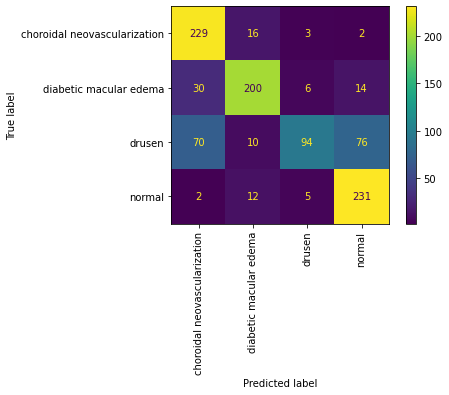

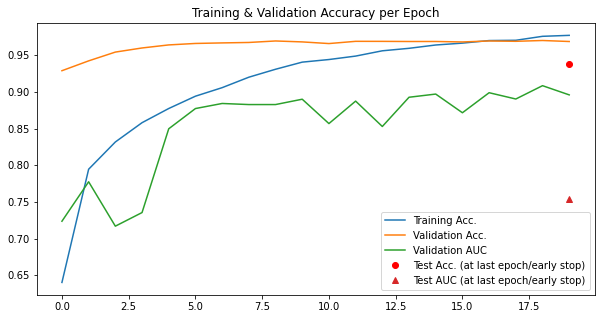

In [24]:
clf = run_classifier_pipeline(
    "octmnist", info_flags, octmnist_noGDA,
    DA_technique=DA_technique
)

#### PneumoniaMNIST

{
  "python_class": "PneumoniaMNIST",
  "description": "The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22122,916)\u00d7(127\u22122,713). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/pneumoniamnist.npz?download=1",
  "MD5": "28209eda62fecd6e6a2d98b1501bb15f",
  "task": "binary-class",
  "label": {
    "0": "normal",
    "1": "pneumonia"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 4708,
    "val": 524,
    "test": 624
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           

100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.61it/s]


train -- accuracy: 0.64
val -- accuracy: 0.89,  AUC: 0.83
Epoch 1



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 38.90it/s]


train -- accuracy: 0.91
val -- accuracy: 0.97,  AUC: 0.93
Epoch 2



100%|███████████████████████████████████████████| 37/37 [00:01<00:00, 36.61it/s]


train -- accuracy: 0.94
val -- accuracy: 0.98,  AUC: 0.94
Epoch 3



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.70it/s]


train -- accuracy: 0.94
val -- accuracy: 0.99,  AUC: 0.93
Epoch 4



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.73it/s]


train -- accuracy: 0.96
val -- accuracy: 0.99,  AUC: 0.93
Epoch 5



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.46it/s]


train -- accuracy: 0.97
val -- accuracy: 0.99,  AUC: 0.95
Epoch 6



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 38.42it/s]


train -- accuracy: 0.97
val -- accuracy: 0.99,  AUC: 0.96
Epoch 7



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 38.15it/s]


train -- accuracy: 0.98
val -- accuracy: 0.99,  AUC: 0.96
Epoch 8



100%|███████████████████████████████████████████| 37/37 [00:01<00:00, 35.91it/s]


train -- accuracy: 0.98
val -- accuracy: 0.99,  AUC: 0.97
Epoch 9



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 39.04it/s]


train -- accuracy: 0.98
val -- accuracy: 0.99,  AUC: 0.97
Epoch 10



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.27it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.95
Epoch 11



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.82it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 12



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.28it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 13



100%|███████████████████████████████████████████| 37/37 [00:01<00:00, 36.63it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 14



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.93it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 15



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 38.21it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 16



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.45it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 17



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.57it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 18



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.92it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.96
Epoch 19



100%|███████████████████████████████████████████| 37/37 [00:00<00:00, 37.48it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.96
test -- accuracy: 0.96,  AUC: 0.86


<Figure size 720x720 with 0 Axes>

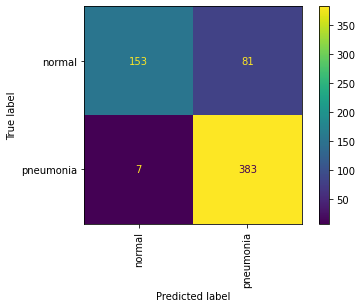

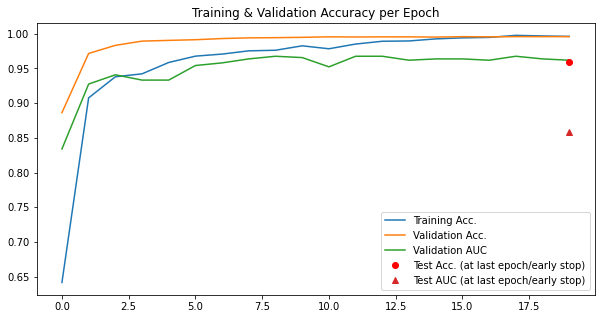

In [25]:
clf = run_classifier_pipeline(
    "pneumoniamnist", info_flags, pneumoniamnist_noGDA,
    DA_technique=DA_technique
)

#### BreastMNIST

{
  "python_class": "BreastMNIST",
  "description": "The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1\u00d7500\u00d7500 are resized into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/breastmnist.npz?download=1",
  "MD5": "750601b1f35ba3300ea97c75c52ff8f6",
  "task": "binary-class",
  "label": {
    "0": "malignant",
    "1": "normal, benign"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 546,
    "val": 78,
    "test": 156
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
    

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 42.25it/s]


train -- accuracy: 0.55
val -- accuracy: 0.58,  AUC: 0.27
Epoch 1



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 41.94it/s]


train -- accuracy: 0.55
val -- accuracy: 0.54,  AUC: 0.27
Epoch 2



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 42.79it/s]


train -- accuracy: 0.65
val -- accuracy: 0.63,  AUC: 0.5
Epoch 3



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 40.00it/s]


train -- accuracy: 0.7
val -- accuracy: 0.68,  AUC: 0.58
Epoch 4



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 42.75it/s]


train -- accuracy: 0.69
val -- accuracy: 0.74,  AUC: 0.64
Epoch 5



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 40.53it/s]


train -- accuracy: 0.71
val -- accuracy: 0.78,  AUC: 0.65
Epoch 6



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 42.78it/s]


train -- accuracy: 0.7
val -- accuracy: 0.79,  AUC: 0.67
Epoch 7



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 42.12it/s]


train -- accuracy: 0.68
val -- accuracy: 0.8,  AUC: 0.67
Epoch 8



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.15it/s]


train -- accuracy: 0.69
val -- accuracy: 0.81,  AUC: 0.73
Epoch 9



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.02it/s]


train -- accuracy: 0.73
val -- accuracy: 0.81,  AUC: 0.74
Epoch 10



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.41it/s]


train -- accuracy: 0.73
val -- accuracy: 0.81,  AUC: 0.74
Epoch 11



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 41.48it/s]


train -- accuracy: 0.75
val -- accuracy: 0.81,  AUC: 0.71
Epoch 12



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 43.13it/s]


train -- accuracy: 0.74
val -- accuracy: 0.82,  AUC: 0.73
Epoch 13



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 43.48it/s]


train -- accuracy: 0.76
val -- accuracy: 0.83,  AUC: 0.76
Epoch 14



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 44.33it/s]


train -- accuracy: 0.79
val -- accuracy: 0.84,  AUC: 0.74
Epoch 15



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 42.58it/s]


train -- accuracy: 0.76
val -- accuracy: 0.84,  AUC: 0.74
Epoch 16



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 43.41it/s]


train -- accuracy: 0.79
val -- accuracy: 0.86,  AUC: 0.76
Epoch 17



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 43.84it/s]


train -- accuracy: 0.81
val -- accuracy: 0.86,  AUC: 0.78
Epoch 18



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 43.78it/s]


train -- accuracy: 0.78
val -- accuracy: 0.86,  AUC: 0.78
Epoch 19



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 43.13it/s]


train -- accuracy: 0.8
val -- accuracy: 0.87,  AUC: 0.78
test -- accuracy: 0.83,  AUC: 0.79


<Figure size 720x720 with 0 Axes>

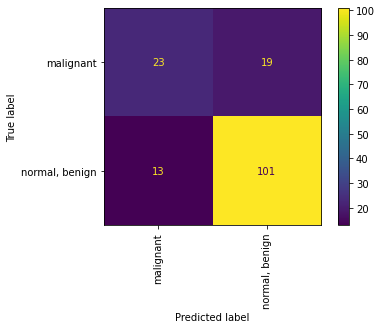

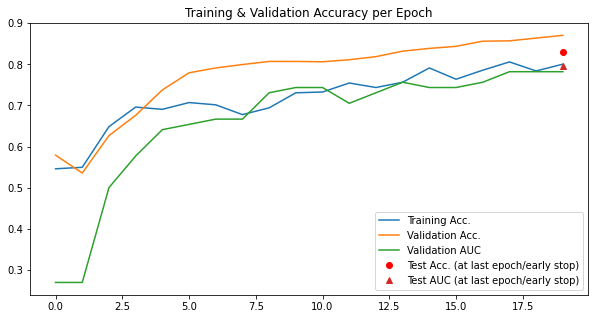

In [26]:
clf = run_classifier_pipeline(
    "breastmnist", info_flags, breastmnist_noGDA,
    DA_technique=DA_technique
)

#### OrganAMNIST

{
  "python_class": "OrganAMNIST",
  "description": "The OrganAMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Axial (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in axial views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organamnist.npz?download=1",
  "MD5": "866b832ed4eeba67bfb9edee1d5544e6",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-left",

100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.84it/s]


train -- accuracy: 0.47
val -- accuracy: 0.97,  AUC: 0.73
Epoch 1



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 38.12it/s]


train -- accuracy: 0.77
val -- accuracy: 0.99,  AUC: 0.9
Epoch 2



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.87it/s]


train -- accuracy: 0.88
val -- accuracy: 1.0,  AUC: 0.93
Epoch 3



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.74it/s]


train -- accuracy: 0.92
val -- accuracy: 1.0,  AUC: 0.95
Epoch 4



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.81it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.95
Epoch 5



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 38.49it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.96
Epoch 6



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.65it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.94
Epoch 7



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.36it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.95
Epoch 8



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 38.81it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.96
Epoch 9



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.90it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.96
Epoch 10



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.17it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.96
Epoch 11



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.43it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 12



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.13it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 13



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.04it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 14



100%|█████████████████████████████████████████| 271/271 [00:06<00:00, 39.02it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 15



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.73it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 16



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.11it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.96
Epoch 17



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.95it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 18



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 37.52it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.96
Epoch 19



100%|█████████████████████████████████████████| 271/271 [00:07<00:00, 38.08it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.96
test -- accuracy: 0.99,  AUC: 0.88


<Figure size 720x720 with 0 Axes>

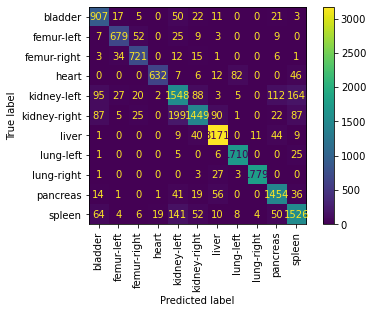

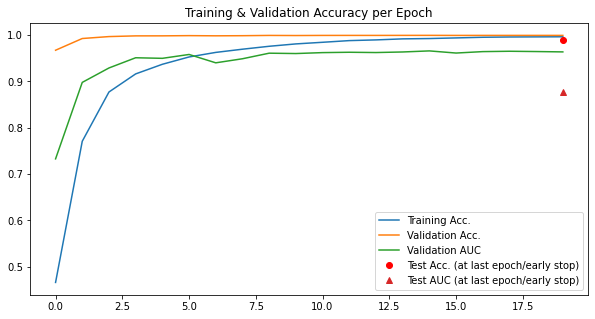

In [27]:
clf = run_classifier_pipeline(
    "organamnist", info_flags, organamnist_noGDA,
    DA_technique=DA_technique
)

#### OrganCMNIST

{
  "python_class": "OrganCMNIST",
  "description": "The OrganCMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Coronal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in coronal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organcmnist.npz?download=1",
  "MD5": "0afa5834fb105f7705a7d93372119a21",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-le

100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 39.44it/s]


train -- accuracy: 0.3
val -- accuracy: 0.91,  AUC: 0.58
Epoch 1



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 37.93it/s]


train -- accuracy: 0.48
val -- accuracy: 0.96,  AUC: 0.72
Epoch 2



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 39.15it/s]


train -- accuracy: 0.64
val -- accuracy: 0.98,  AUC: 0.78
Epoch 3



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 37.41it/s]


train -- accuracy: 0.75
val -- accuracy: 0.99,  AUC: 0.87
Epoch 4



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 37.49it/s]


train -- accuracy: 0.8
val -- accuracy: 0.99,  AUC: 0.86
Epoch 5



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 37.62it/s]


train -- accuracy: 0.83
val -- accuracy: 1.0,  AUC: 0.93
Epoch 6



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 37.15it/s]


train -- accuracy: 0.86
val -- accuracy: 1.0,  AUC: 0.95
Epoch 7



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 38.14it/s]


train -- accuracy: 0.88
val -- accuracy: 1.0,  AUC: 0.93
Epoch 8



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 37.53it/s]


train -- accuracy: 0.9
val -- accuracy: 1.0,  AUC: 0.94
Epoch 9



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 37.86it/s]


train -- accuracy: 0.91
val -- accuracy: 1.0,  AUC: 0.95
Epoch 10



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 38.15it/s]


train -- accuracy: 0.92
val -- accuracy: 1.0,  AUC: 0.94
Epoch 11



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 37.28it/s]


train -- accuracy: 0.92
val -- accuracy: 1.0,  AUC: 0.93
Epoch 12



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 37.70it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.95
Epoch 13



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 37.26it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.94
Epoch 14



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 35.99it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.94
Epoch 15



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 39.59it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.94
Epoch 16



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 38.33it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.95
Epoch 17



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 38.61it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.95
Epoch 18



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 38.02it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.94
Epoch 19



100%|█████████████████████████████████████████| 102/102 [00:02<00:00, 37.78it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.95
test -- accuracy: 0.99,  AUC: 0.86


<Figure size 720x720 with 0 Axes>

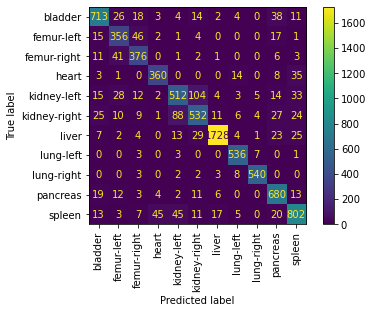

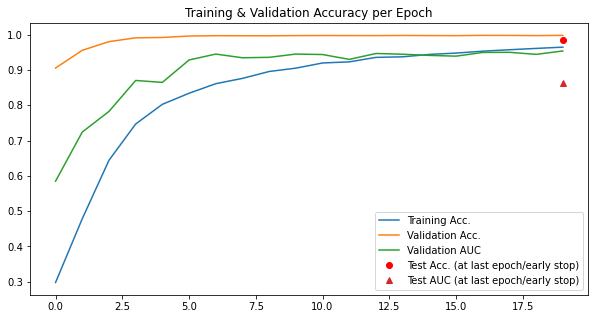

In [28]:
clf = run_classifier_pipeline(
    "organcmnist", info_flags, organcmnist_noGDA,
    DA_technique=DA_technique
)

#### OrganSMNIST

{
  "python_class": "OrganSMNIST",
  "description": "The OrganSMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Sagittal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in sagittal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organsmnist.npz?download=1",
  "MD5": "e5c39f1af030238290b9557d9503af9d",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-

100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.23it/s]


train -- accuracy: 0.22
val -- accuracy: 0.85,  AUC: 0.32
Epoch 1



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.22it/s]


train -- accuracy: 0.37
val -- accuracy: 0.9,  AUC: 0.55
Epoch 2



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 38.74it/s]


train -- accuracy: 0.48
val -- accuracy: 0.94,  AUC: 0.58
Epoch 3



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.00it/s]


train -- accuracy: 0.56
val -- accuracy: 0.96,  AUC: 0.67
Epoch 4



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.80it/s]


train -- accuracy: 0.61
val -- accuracy: 0.97,  AUC: 0.71
Epoch 5



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.30it/s]


train -- accuracy: 0.66
val -- accuracy: 0.98,  AUC: 0.77
Epoch 6



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 38.57it/s]


train -- accuracy: 0.7
val -- accuracy: 0.98,  AUC: 0.79
Epoch 7



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 38.67it/s]


train -- accuracy: 0.73
val -- accuracy: 0.99,  AUC: 0.79
Epoch 8



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 38.15it/s]


train -- accuracy: 0.75
val -- accuracy: 0.99,  AUC: 0.81
Epoch 9



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 37.46it/s]


train -- accuracy: 0.77
val -- accuracy: 0.99,  AUC: 0.83
Epoch 10



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.16it/s]


train -- accuracy: 0.79
val -- accuracy: 0.99,  AUC: 0.83
Epoch 11



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.80it/s]


train -- accuracy: 0.81
val -- accuracy: 0.99,  AUC: 0.83
Epoch 12



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 39.32it/s]


train -- accuracy: 0.82
val -- accuracy: 0.99,  AUC: 0.84
Epoch 13



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 38.33it/s]


train -- accuracy: 0.83
val -- accuracy: 0.99,  AUC: 0.83
Epoch 14



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.51it/s]


train -- accuracy: 0.84
val -- accuracy: 0.99,  AUC: 0.86
Epoch 15



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.45it/s]


train -- accuracy: 0.86
val -- accuracy: 0.99,  AUC: 0.85
Epoch 16



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.19it/s]


train -- accuracy: 0.86
val -- accuracy: 0.99,  AUC: 0.85
Epoch 17



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.30it/s]


train -- accuracy: 0.87
val -- accuracy: 0.99,  AUC: 0.85
Epoch 18



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.39it/s]


train -- accuracy: 0.9
val -- accuracy: 0.99,  AUC: 0.82
Epoch 19



100%|█████████████████████████████████████████| 109/109 [00:02<00:00, 40.25it/s]


train -- accuracy: 0.9
val -- accuracy: 0.99,  AUC: 0.83
test -- accuracy: 0.96,  AUC: 0.71


<Figure size 720x720 with 0 Axes>

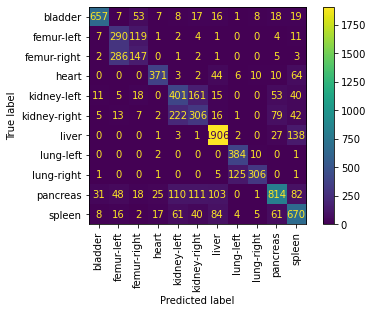

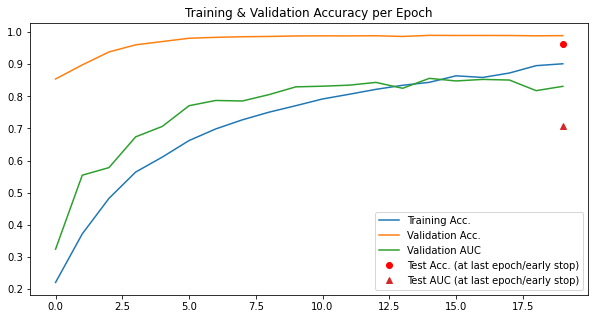

In [29]:
clf = run_classifier_pipeline(
    "organsmnist", info_flags, organsmnist_noGDA,
    DA_technique=DA_technique
)

### 3.3. Training on the MedMNIST datasets with WSR and GDA

In [30]:
# Declares the baseline setup to save the related model
DA_technique="_WSR_GDA"

#### PathMNIST

{
  "python_class": "PathMNIST",
  "description": "The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3\u00d7224\u00d7224 into 3\u00d728\u00d728, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/pathmnist.npz?download=1",
  "MD5": "a8b06965200029087d5bd730944a56c1",
  "task": "multi-class",
  "label": {
    "0": "adipose",
    "1": "background",
    "2": "debris",
    "3": "lymphocytes",
    "4": "mucus",
    "5": "smooth muscle",
    "6": "normal colon mucosa"

100%|█████████████████████████████████████████| 704/704 [01:48<00:00,  6.46it/s]


train -- accuracy: 0.39
val -- accuracy: 0.89,  AUC: 0.55
Epoch 1



100%|█████████████████████████████████████████| 704/704 [01:51<00:00,  6.31it/s]


train -- accuracy: 0.57
val -- accuracy: 0.93,  AUC: 0.62
Epoch 2



100%|█████████████████████████████████████████| 704/704 [02:05<00:00,  5.59it/s]


train -- accuracy: 0.62
val -- accuracy: 0.94,  AUC: 0.66
Epoch 3



100%|█████████████████████████████████████████| 704/704 [02:07<00:00,  5.53it/s]


train -- accuracy: 0.66
val -- accuracy: 0.95,  AUC: 0.7
Epoch 4



100%|█████████████████████████████████████████| 704/704 [01:58<00:00,  5.92it/s]


train -- accuracy: 0.7
val -- accuracy: 0.96,  AUC: 0.75
Epoch 5



100%|█████████████████████████████████████████| 704/704 [02:01<00:00,  5.78it/s]


train -- accuracy: 0.72
val -- accuracy: 0.96,  AUC: 0.74
Epoch 6



100%|█████████████████████████████████████████| 704/704 [01:56<00:00,  6.02it/s]


train -- accuracy: 0.74
val -- accuracy: 0.97,  AUC: 0.77
Epoch 7



100%|█████████████████████████████████████████| 704/704 [02:04<00:00,  5.67it/s]


train -- accuracy: 0.75
val -- accuracy: 0.98,  AUC: 0.79
Epoch 8



100%|█████████████████████████████████████████| 704/704 [02:07<00:00,  5.51it/s]


train -- accuracy: 0.76
val -- accuracy: 0.98,  AUC: 0.82
Epoch 9



100%|█████████████████████████████████████████| 704/704 [02:15<00:00,  5.20it/s]


train -- accuracy: 0.77
val -- accuracy: 0.98,  AUC: 0.82
Epoch 10



100%|█████████████████████████████████████████| 704/704 [02:31<00:00,  4.65it/s]


train -- accuracy: 0.78
val -- accuracy: 0.98,  AUC: 0.81
Epoch 11



100%|█████████████████████████████████████████| 704/704 [02:31<00:00,  4.66it/s]


train -- accuracy: 0.79
val -- accuracy: 0.98,  AUC: 0.83
Epoch 12



100%|█████████████████████████████████████████| 704/704 [02:46<00:00,  4.24it/s]


train -- accuracy: 0.8
val -- accuracy: 0.98,  AUC: 0.83
Epoch 13



100%|█████████████████████████████████████████| 704/704 [02:52<00:00,  4.08it/s]


train -- accuracy: 0.81
val -- accuracy: 0.98,  AUC: 0.84
Epoch 14



100%|█████████████████████████████████████████| 704/704 [02:44<00:00,  4.27it/s]


train -- accuracy: 0.81
val -- accuracy: 0.99,  AUC: 0.85
Epoch 15



100%|█████████████████████████████████████████| 704/704 [02:25<00:00,  4.85it/s]


train -- accuracy: 0.81
val -- accuracy: 0.98,  AUC: 0.83
Epoch 16



100%|█████████████████████████████████████████| 704/704 [02:16<00:00,  5.15it/s]


train -- accuracy: 0.82
val -- accuracy: 0.99,  AUC: 0.86
Epoch 17



100%|█████████████████████████████████████████| 704/704 [02:14<00:00,  5.22it/s]


train -- accuracy: 0.82
val -- accuracy: 0.99,  AUC: 0.87
Epoch 18



100%|█████████████████████████████████████████| 704/704 [02:51<00:00,  4.10it/s]


train -- accuracy: 0.83
val -- accuracy: 0.99,  AUC: 0.86
Epoch 19



100%|█████████████████████████████████████████| 704/704 [02:45<00:00,  4.26it/s]


train -- accuracy: 0.83
val -- accuracy: 0.99,  AUC: 0.86
test -- accuracy: 0.99,  AUC: 0.88


<Figure size 720x720 with 0 Axes>

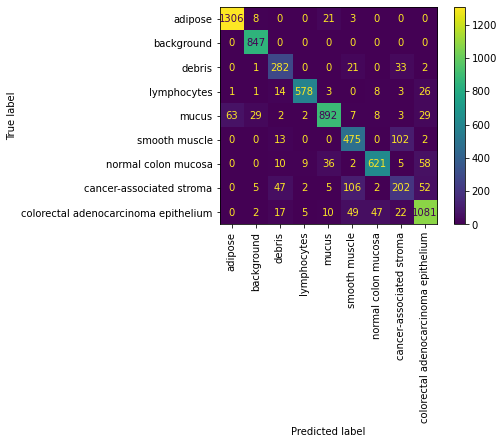

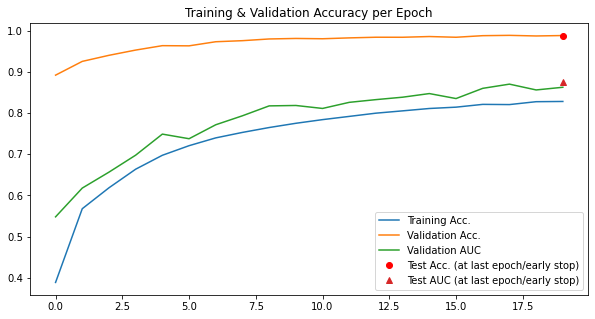

In [31]:
clf = run_classifier_pipeline(
    "pathmnist", info_flags, pathmnist_WSR_GDA,
    DA_technique=DA_technique
)

#### DermaMNIST

{
  "python_class": "DermaMNIST",
  "description": "The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3\u00d7600\u00d7450 are resized into 3\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/dermamnist.npz?download=1",
  "MD5": "0744692d530f8e62ec473284d019b0c7",
  "task": "multi-class",
  "label": {
    "0": "actinic keratoses and intraepithelial carcinoma",
    "1": "basal cell carcinoma",
    "2": "benign keratosis-like lesions",
    "3": "dermatofibroma",
    "4": "melanoma",
    "5": "melanocytic nevi",
    "6": "vascular lesions"
  },
  "n_channels": 3,
  "n_samples": {
    "train": 7007,
    "val": 1003,
    "test": 2005
  },
  "license": "CC B

100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.35it/s]


train -- accuracy: 0.19
val -- accuracy: 0.72,  AUC: 0.17
Epoch 1



100%|███████████████████████████████████████████| 55/55 [00:11<00:00,  4.96it/s]


train -- accuracy: 0.25
val -- accuracy: 0.73,  AUC: 0.29
Epoch 2



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.22it/s]


train -- accuracy: 0.28
val -- accuracy: 0.75,  AUC: 0.41
Epoch 3



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.42it/s]


train -- accuracy: 0.31
val -- accuracy: 0.77,  AUC: 0.44
Epoch 4



100%|███████████████████████████████████████████| 55/55 [00:11<00:00,  4.84it/s]


train -- accuracy: 0.32
val -- accuracy: 0.77,  AUC: 0.45
Epoch 5



100%|███████████████████████████████████████████| 55/55 [00:11<00:00,  4.66it/s]


train -- accuracy: 0.33
val -- accuracy: 0.79,  AUC: 0.39
Epoch 6



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.34it/s]


train -- accuracy: 0.34
val -- accuracy: 0.78,  AUC: 0.41
Epoch 7



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.17it/s]


train -- accuracy: 0.35
val -- accuracy: 0.79,  AUC: 0.46
Epoch 8



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.22it/s]


train -- accuracy: 0.36
val -- accuracy: 0.8,  AUC: 0.45
Epoch 9



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.11it/s]


train -- accuracy: 0.36
val -- accuracy: 0.81,  AUC: 0.44
Epoch 10



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.15it/s]


train -- accuracy: 0.37
val -- accuracy: 0.81,  AUC: 0.44
Epoch 11



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.22it/s]


train -- accuracy: 0.38
val -- accuracy: 0.81,  AUC: 0.39
Epoch 12



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.27it/s]


train -- accuracy: 0.38
val -- accuracy: 0.82,  AUC: 0.47
Epoch 13



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.30it/s]


train -- accuracy: 0.4
val -- accuracy: 0.83,  AUC: 0.44
Epoch 14



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.44it/s]


train -- accuracy: 0.4
val -- accuracy: 0.83,  AUC: 0.45
Epoch 15



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.41it/s]


train -- accuracy: 0.4
val -- accuracy: 0.84,  AUC: 0.46
Epoch 16



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.29it/s]


train -- accuracy: 0.42
val -- accuracy: 0.85,  AUC: 0.46
Epoch 17



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.13it/s]


train -- accuracy: 0.42
val -- accuracy: 0.83,  AUC: 0.43
Epoch 18



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.31it/s]


train -- accuracy: 0.41
val -- accuracy: 0.84,  AUC: 0.54
Epoch 19



100%|███████████████████████████████████████████| 55/55 [00:10<00:00,  5.16it/s]


train -- accuracy: 0.43
val -- accuracy: 0.84,  AUC: 0.49
test -- accuracy: 0.85,  AUC: 0.51


<Figure size 720x720 with 0 Axes>

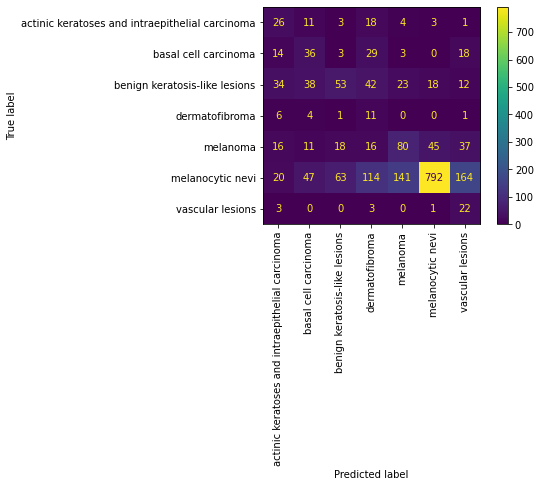

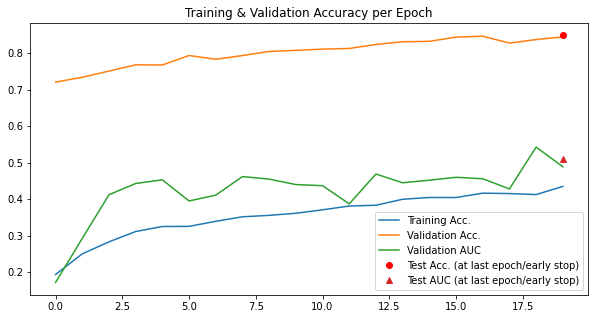

In [32]:
clf = run_classifier_pipeline(
    "dermamnist", info_flags, dermamnist_WSR_GDA,
    DA_technique=DA_technique
)

#### OctMNIST

{
  "python_class": "OCTMNIST",
  "description": "The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22121,536)\u00d7(277\u2212512). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/octmnist.npz?download=1",
  "MD5": "c68d92d5b585d8d81f7112f81e2d0842",
  "task": "multi-class",
  "label": {
    "0": "choroidal neovascularization",
    "1": "diabetic macular edema",
    "2": "drusen",
    "3": "normal"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 97477,
    "val": 10832,
    "test": 1000
  },
  "license": "CC BY 4.0"
}
--------------------------------

100%|█████████████████████████████████████████| 762/762 [00:45<00:00, 16.63it/s]


train -- accuracy: 0.55
val -- accuracy: 0.91,  AUC: 0.76
Epoch 1



100%|█████████████████████████████████████████| 762/762 [00:55<00:00, 13.84it/s]


train -- accuracy: 0.71
val -- accuracy: 0.93,  AUC: 0.78
Epoch 2



100%|█████████████████████████████████████████| 762/762 [00:48<00:00, 15.87it/s]


train -- accuracy: 0.75
val -- accuracy: 0.94,  AUC: 0.79
Epoch 3



100%|█████████████████████████████████████████| 762/762 [00:53<00:00, 14.15it/s]


train -- accuracy: 0.77
val -- accuracy: 0.95,  AUC: 0.79
Epoch 4



100%|█████████████████████████████████████████| 762/762 [00:41<00:00, 18.38it/s]


train -- accuracy: 0.78
val -- accuracy: 0.95,  AUC: 0.8
Epoch 5



100%|█████████████████████████████████████████| 762/762 [00:46<00:00, 16.40it/s]


train -- accuracy: 0.8
val -- accuracy: 0.96,  AUC: 0.87
Epoch 6



100%|█████████████████████████████████████████| 762/762 [00:35<00:00, 21.75it/s]


train -- accuracy: 0.81
val -- accuracy: 0.96,  AUC: 0.8
Epoch 7



100%|█████████████████████████████████████████| 762/762 [00:34<00:00, 21.78it/s]


train -- accuracy: 0.82
val -- accuracy: 0.96,  AUC: 0.84
Epoch 8



100%|█████████████████████████████████████████| 762/762 [00:36<00:00, 21.15it/s]


train -- accuracy: 0.82
val -- accuracy: 0.96,  AUC: 0.85
Epoch 9



100%|█████████████████████████████████████████| 762/762 [00:35<00:00, 21.57it/s]


train -- accuracy: 0.83
val -- accuracy: 0.96,  AUC: 0.86
Epoch 10



100%|█████████████████████████████████████████| 762/762 [00:34<00:00, 21.94it/s]


train -- accuracy: 0.83
val -- accuracy: 0.96,  AUC: 0.83
Epoch 11



100%|█████████████████████████████████████████| 762/762 [00:48<00:00, 15.78it/s]


train -- accuracy: 0.84
val -- accuracy: 0.96,  AUC: 0.87
Epoch 12



100%|█████████████████████████████████████████| 762/762 [00:42<00:00, 17.87it/s]


train -- accuracy: 0.84
val -- accuracy: 0.96,  AUC: 0.79
Epoch 13



100%|█████████████████████████████████████████| 762/762 [00:52<00:00, 14.44it/s]


train -- accuracy: 0.84
val -- accuracy: 0.96,  AUC: 0.85
Epoch 14



100%|█████████████████████████████████████████| 762/762 [00:45<00:00, 16.66it/s]


train -- accuracy: 0.85
val -- accuracy: 0.97,  AUC: 0.84
Epoch 15



100%|█████████████████████████████████████████| 762/762 [00:44<00:00, 16.99it/s]


train -- accuracy: 0.85
val -- accuracy: 0.96,  AUC: 0.8
Epoch 16



100%|█████████████████████████████████████████| 762/762 [00:48<00:00, 15.61it/s]


train -- accuracy: 0.85
val -- accuracy: 0.96,  AUC: 0.85
Epoch 17



100%|█████████████████████████████████████████| 762/762 [00:47<00:00, 15.89it/s]


train -- accuracy: 0.85
val -- accuracy: 0.97,  AUC: 0.83
Epoch 18



100%|█████████████████████████████████████████| 762/762 [00:45<00:00, 16.58it/s]


train -- accuracy: 0.86
val -- accuracy: 0.97,  AUC: 0.86
Epoch 19



100%|█████████████████████████████████████████| 762/762 [00:44<00:00, 17.03it/s]


train -- accuracy: 0.86
val -- accuracy: 0.96,  AUC: 0.84
test -- accuracy: 0.94,  AUC: 0.73


<Figure size 720x720 with 0 Axes>

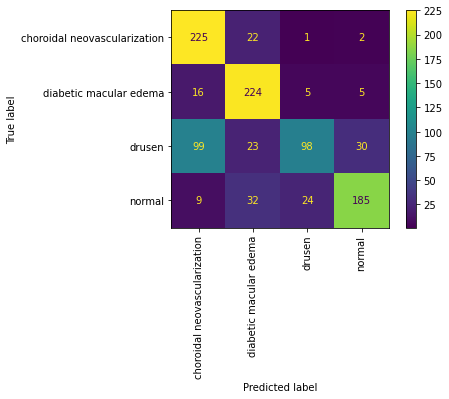

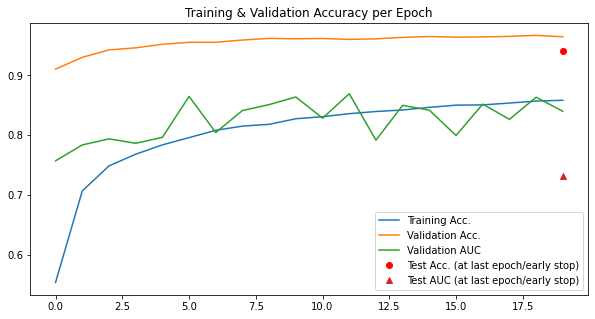

In [33]:
clf = run_classifier_pipeline(
    "octmnist", info_flags, octmnist_WSR_GDA,
    DA_technique=DA_technique
)

#### PneumoniaMNIST

{
  "python_class": "PneumoniaMNIST",
  "description": "The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22122,916)\u00d7(127\u22122,713). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/pneumoniamnist.npz?download=1",
  "MD5": "28209eda62fecd6e6a2d98b1501bb15f",
  "task": "binary-class",
  "label": {
    "0": "normal",
    "1": "pneumonia"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 4708,
    "val": 524,
    "test": 624
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           

100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 17.49it/s]


train -- accuracy: 0.61
val -- accuracy: 0.85,  AUC: 0.81
Epoch 1



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 18.06it/s]


train -- accuracy: 0.87
val -- accuracy: 0.95,  AUC: 0.88
Epoch 2



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 17.35it/s]


train -- accuracy: 0.9
val -- accuracy: 0.97,  AUC: 0.92
Epoch 3



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 17.92it/s]


train -- accuracy: 0.92
val -- accuracy: 0.98,  AUC: 0.92
Epoch 4



100%|███████████████████████████████████████████| 37/37 [00:01<00:00, 18.62it/s]


train -- accuracy: 0.92
val -- accuracy: 0.99,  AUC: 0.9
Epoch 5



100%|███████████████████████████████████████████| 37/37 [00:01<00:00, 18.77it/s]


train -- accuracy: 0.94
val -- accuracy: 0.99,  AUC: 0.96
Epoch 6



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 14.38it/s]


train -- accuracy: 0.94
val -- accuracy: 0.99,  AUC: 0.95
Epoch 7



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.43it/s]


train -- accuracy: 0.95
val -- accuracy: 0.99,  AUC: 0.96
Epoch 8



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 14.10it/s]


train -- accuracy: 0.95
val -- accuracy: 0.99,  AUC: 0.95
Epoch 9



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 12.74it/s]


train -- accuracy: 0.96
val -- accuracy: 0.99,  AUC: 0.96
Epoch 10



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 15.44it/s]


train -- accuracy: 0.95
val -- accuracy: 0.99,  AUC: 0.96
Epoch 11



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 14.56it/s]


train -- accuracy: 0.96
val -- accuracy: 0.99,  AUC: 0.95
Epoch 12



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 17.24it/s]


train -- accuracy: 0.96
val -- accuracy: 0.99,  AUC: 0.95
Epoch 13



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 14.75it/s]


train -- accuracy: 0.96
val -- accuracy: 0.99,  AUC: 0.96
Epoch 14



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 13.17it/s]


train -- accuracy: 0.97
val -- accuracy: 0.99,  AUC: 0.94
Epoch 15



100%|███████████████████████████████████████████| 37/37 [00:01<00:00, 19.08it/s]


train -- accuracy: 0.96
val -- accuracy: 0.99,  AUC: 0.96
Epoch 16



100%|███████████████████████████████████████████| 37/37 [00:01<00:00, 19.03it/s]


train -- accuracy: 0.97
val -- accuracy: 0.99,  AUC: 0.96
Epoch 17



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 17.16it/s]


train -- accuracy: 0.97
val -- accuracy: 0.99,  AUC: 0.95
Epoch 18



100%|███████████████████████████████████████████| 37/37 [00:02<00:00, 13.25it/s]


train -- accuracy: 0.97
val -- accuracy: 0.99,  AUC: 0.96
Epoch 19



100%|███████████████████████████████████████████| 37/37 [00:01<00:00, 18.60it/s]


train -- accuracy: 0.97
val -- accuracy: 0.99,  AUC: 0.96
test -- accuracy: 0.97,  AUC: 0.88


<Figure size 720x720 with 0 Axes>

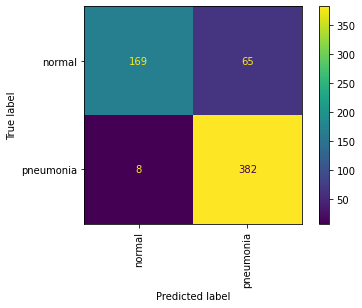

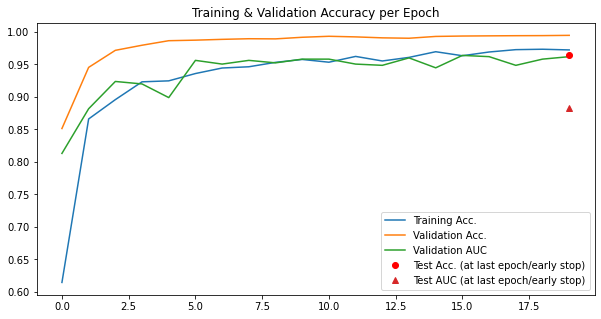

In [34]:
clf = run_classifier_pipeline(
    "pneumoniamnist", info_flags, pneumoniamnist_WSR_GDA,
    DA_technique=DA_technique
)

#### BreastMNIST

{
  "python_class": "BreastMNIST",
  "description": "The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1\u00d7500\u00d7500 are resized into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/breastmnist.npz?download=1",
  "MD5": "750601b1f35ba3300ea97c75c52ff8f6",
  "task": "binary-class",
  "label": {
    "0": "malignant",
    "1": "normal, benign"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 546,
    "val": 78,
    "test": 156
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
    

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 19.57it/s]


train -- accuracy: 0.48
val -- accuracy: 0.54,  AUC: 0.27
Epoch 1



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 20.75it/s]


train -- accuracy: 0.54
val -- accuracy: 0.48,  AUC: 0.71
Epoch 2



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 20.81it/s]


train -- accuracy: 0.57
val -- accuracy: 0.43,  AUC: 0.72
Epoch 3



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 14.17it/s]


train -- accuracy: 0.59
val -- accuracy: 0.53,  AUC: 0.72
Epoch 4



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 14.86it/s]


train -- accuracy: 0.6
val -- accuracy: 0.57,  AUC: 0.76
Epoch 5



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 17.37it/s]


train -- accuracy: 0.62
val -- accuracy: 0.68,  AUC: 0.72
Epoch 6



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 18.48it/s]


train -- accuracy: 0.64
val -- accuracy: 0.72,  AUC: 0.74
Epoch 7



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 16.25it/s]


train -- accuracy: 0.64
val -- accuracy: 0.73,  AUC: 0.73
Epoch 8



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 20.47it/s]


train -- accuracy: 0.66
val -- accuracy: 0.73,  AUC: 0.69
Epoch 9



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 15.95it/s]


train -- accuracy: 0.66
val -- accuracy: 0.73,  AUC: 0.71
Epoch 10



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 19.54it/s]


train -- accuracy: 0.66
val -- accuracy: 0.74,  AUC: 0.69
Epoch 11



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 19.44it/s]


train -- accuracy: 0.69
val -- accuracy: 0.74,  AUC: 0.71
Epoch 12



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 17.11it/s]


train -- accuracy: 0.66
val -- accuracy: 0.73,  AUC: 0.68
Epoch 13



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 19.66it/s]


train -- accuracy: 0.65
val -- accuracy: 0.73,  AUC: 0.68
Epoch 14



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 15.86it/s]


train -- accuracy: 0.66
val -- accuracy: 0.74,  AUC: 0.65
Epoch 15



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 21.27it/s]


train -- accuracy: 0.67
val -- accuracy: 0.74,  AUC: 0.65
Epoch 16



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 20.23it/s]


train -- accuracy: 0.71
val -- accuracy: 0.74,  AUC: 0.65
Epoch 17



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 21.26it/s]


train -- accuracy: 0.7
val -- accuracy: 0.74,  AUC: 0.65
Epoch 18



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 15.54it/s]


train -- accuracy: 0.67
val -- accuracy: 0.74,  AUC: 0.69
Epoch 19



100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 17.95it/s]


train -- accuracy: 0.71
val -- accuracy: 0.74,  AUC: 0.68
test -- accuracy: 0.72,  AUC: 0.69


<Figure size 720x720 with 0 Axes>

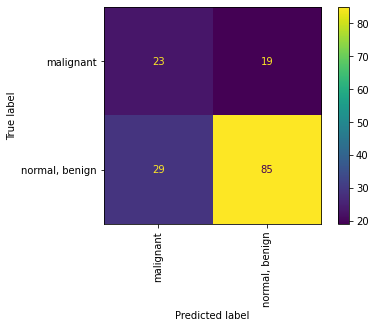

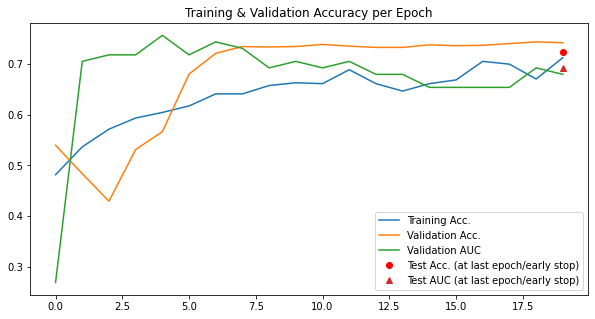

In [46]:
clf = run_classifier_pipeline(
    "breastmnist", info_flags, breastmnist_WSR_GDA,
    DA_technique=DA_technique
)

#### OrganAMNIST

{
  "python_class": "OrganAMNIST",
  "description": "The OrganAMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Axial (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in axial views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organamnist.npz?download=1",
  "MD5": "866b832ed4eeba67bfb9edee1d5544e6",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-left",

100%|█████████████████████████████████████████| 271/271 [00:15<00:00, 17.34it/s]


train -- accuracy: 0.34
val -- accuracy: 0.93,  AUC: 0.5
Epoch 1



100%|█████████████████████████████████████████| 271/271 [00:15<00:00, 16.94it/s]


train -- accuracy: 0.58
val -- accuracy: 0.96,  AUC: 0.73
Epoch 2



100%|█████████████████████████████████████████| 271/271 [00:17<00:00, 15.89it/s]


train -- accuracy: 0.7
val -- accuracy: 0.99,  AUC: 0.85
Epoch 3



100%|█████████████████████████████████████████| 271/271 [00:17<00:00, 15.69it/s]


train -- accuracy: 0.79
val -- accuracy: 0.99,  AUC: 0.87
Epoch 4



100%|█████████████████████████████████████████| 271/271 [00:18<00:00, 14.58it/s]


train -- accuracy: 0.83
val -- accuracy: 0.99,  AUC: 0.9
Epoch 5



100%|█████████████████████████████████████████| 271/271 [00:16<00:00, 16.22it/s]


train -- accuracy: 0.85
val -- accuracy: 0.99,  AUC: 0.9
Epoch 6



100%|█████████████████████████████████████████| 271/271 [00:16<00:00, 16.13it/s]


train -- accuracy: 0.87
val -- accuracy: 1.0,  AUC: 0.92
Epoch 7



100%|█████████████████████████████████████████| 271/271 [00:16<00:00, 16.65it/s]


train -- accuracy: 0.88
val -- accuracy: 1.0,  AUC: 0.92
Epoch 8



100%|█████████████████████████████████████████| 271/271 [00:15<00:00, 17.25it/s]


train -- accuracy: 0.89
val -- accuracy: 1.0,  AUC: 0.92
Epoch 9



100%|█████████████████████████████████████████| 271/271 [00:15<00:00, 17.77it/s]


train -- accuracy: 0.9
val -- accuracy: 1.0,  AUC: 0.92
Epoch 10



100%|█████████████████████████████████████████| 271/271 [00:17<00:00, 15.07it/s]


train -- accuracy: 0.91
val -- accuracy: 1.0,  AUC: 0.92
Epoch 11



100%|█████████████████████████████████████████| 271/271 [00:17<00:00, 15.35it/s]


train -- accuracy: 0.92
val -- accuracy: 1.0,  AUC: 0.91
Epoch 12



100%|█████████████████████████████████████████| 271/271 [00:16<00:00, 16.59it/s]


train -- accuracy: 0.92
val -- accuracy: 1.0,  AUC: 0.91
Epoch 13



100%|█████████████████████████████████████████| 271/271 [00:16<00:00, 16.91it/s]


train -- accuracy: 0.93
val -- accuracy: 1.0,  AUC: 0.93
Epoch 14



100%|█████████████████████████████████████████| 271/271 [00:15<00:00, 17.26it/s]


train -- accuracy: 0.93
val -- accuracy: 1.0,  AUC: 0.92
Epoch 15



100%|█████████████████████████████████████████| 271/271 [00:15<00:00, 17.33it/s]


train -- accuracy: 0.93
val -- accuracy: 1.0,  AUC: 0.93
Epoch 16



100%|█████████████████████████████████████████| 271/271 [00:17<00:00, 15.93it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.93
Epoch 17



100%|█████████████████████████████████████████| 271/271 [00:16<00:00, 16.81it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.94
Epoch 18



100%|█████████████████████████████████████████| 271/271 [00:17<00:00, 15.35it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.94
Epoch 19



100%|█████████████████████████████████████████| 271/271 [00:15<00:00, 17.35it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.94
test -- accuracy: 0.99,  AUC: 0.85


<Figure size 720x720 with 0 Axes>

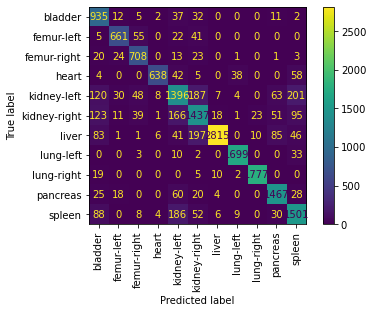

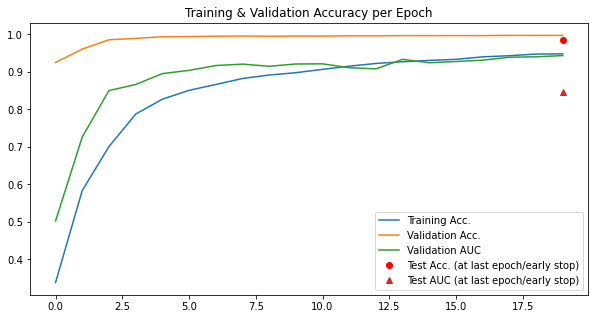

In [47]:
clf = run_classifier_pipeline(
    "organamnist", info_flags, organamnist_WSR_GDA,
    DA_technique=DA_technique
)

#### OrganCMNIST

{
  "python_class": "OrganCMNIST",
  "description": "The OrganCMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Coronal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in coronal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organcmnist.npz?download=1",
  "MD5": "0afa5834fb105f7705a7d93372119a21",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-le

100%|█████████████████████████████████████████| 102/102 [00:05<00:00, 17.76it/s]


train -- accuracy: 0.21
val -- accuracy: 0.86,  AUC: 0.41
Epoch 1



100%|█████████████████████████████████████████| 102/102 [00:05<00:00, 17.32it/s]


train -- accuracy: 0.39
val -- accuracy: 0.91,  AUC: 0.52
Epoch 2



100%|█████████████████████████████████████████| 102/102 [00:06<00:00, 14.90it/s]


train -- accuracy: 0.49
val -- accuracy: 0.94,  AUC: 0.63
Epoch 3



100%|█████████████████████████████████████████| 102/102 [00:06<00:00, 16.69it/s]


train -- accuracy: 0.57
val -- accuracy: 0.96,  AUC: 0.69
Epoch 4



100%|█████████████████████████████████████████| 102/102 [00:05<00:00, 17.10it/s]


train -- accuracy: 0.64
val -- accuracy: 0.98,  AUC: 0.78
Epoch 5



100%|█████████████████████████████████████████| 102/102 [00:06<00:00, 15.43it/s]


train -- accuracy: 0.67
val -- accuracy: 0.98,  AUC: 0.76
Epoch 6



100%|█████████████████████████████████████████| 102/102 [00:05<00:00, 18.29it/s]


train -- accuracy: 0.7
val -- accuracy: 0.98,  AUC: 0.82
Epoch 7



100%|█████████████████████████████████████████| 102/102 [00:05<00:00, 17.86it/s]


train -- accuracy: 0.73
val -- accuracy: 0.99,  AUC: 0.83
Epoch 8



100%|█████████████████████████████████████████| 102/102 [00:05<00:00, 17.70it/s]


train -- accuracy: 0.75
val -- accuracy: 0.99,  AUC: 0.86
Epoch 9



100%|█████████████████████████████████████████| 102/102 [00:05<00:00, 17.50it/s]


train -- accuracy: 0.77
val -- accuracy: 0.99,  AUC: 0.86
Epoch 10



100%|█████████████████████████████████████████| 102/102 [00:05<00:00, 17.57it/s]


train -- accuracy: 0.78
val -- accuracy: 0.99,  AUC: 0.89
Epoch 11



100%|█████████████████████████████████████████| 102/102 [00:06<00:00, 15.91it/s]


train -- accuracy: 0.8
val -- accuracy: 0.99,  AUC: 0.9
Epoch 12



100%|█████████████████████████████████████████| 102/102 [00:07<00:00, 13.25it/s]


train -- accuracy: 0.81
val -- accuracy: 0.99,  AUC: 0.91
Epoch 13



100%|█████████████████████████████████████████| 102/102 [00:05<00:00, 17.45it/s]


train -- accuracy: 0.82
val -- accuracy: 0.99,  AUC: 0.92
Epoch 14



100%|█████████████████████████████████████████| 102/102 [00:06<00:00, 16.29it/s]


train -- accuracy: 0.83
val -- accuracy: 0.99,  AUC: 0.9
Epoch 15



100%|█████████████████████████████████████████| 102/102 [00:06<00:00, 15.81it/s]


train -- accuracy: 0.84
val -- accuracy: 1.0,  AUC: 0.91
Epoch 16



100%|█████████████████████████████████████████| 102/102 [00:06<00:00, 15.53it/s]


train -- accuracy: 0.84
val -- accuracy: 0.99,  AUC: 0.89
Epoch 17



100%|█████████████████████████████████████████| 102/102 [00:05<00:00, 17.02it/s]


train -- accuracy: 0.84
val -- accuracy: 1.0,  AUC: 0.92
Epoch 18



100%|█████████████████████████████████████████| 102/102 [00:07<00:00, 13.57it/s]


train -- accuracy: 0.85
val -- accuracy: 1.0,  AUC: 0.92
Epoch 19



100%|█████████████████████████████████████████| 102/102 [00:09<00:00, 11.28it/s]


train -- accuracy: 0.85
val -- accuracy: 1.0,  AUC: 0.93
test -- accuracy: 0.97,  AUC: 0.78


<Figure size 720x720 with 0 Axes>

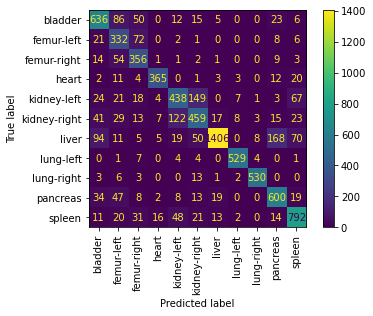

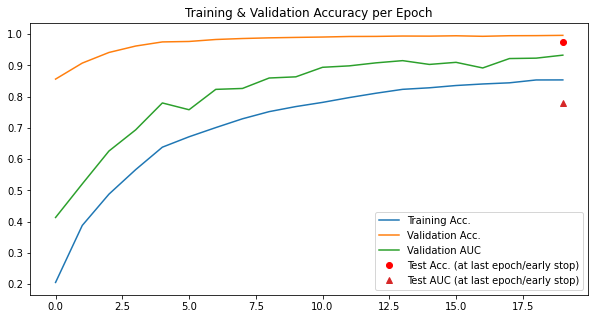

In [48]:
clf = run_classifier_pipeline(
    "organcmnist", info_flags, organcmnist_WSR_GDA,
    DA_technique=DA_technique
)

#### OrganSMNIST

{
  "python_class": "OrganSMNIST",
  "description": "The OrganSMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Sagittal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in sagittal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organsmnist.npz?download=1",
  "MD5": "e5c39f1af030238290b9557d9503af9d",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-

100%|█████████████████████████████████████████| 109/109 [00:07<00:00, 14.70it/s]


train -- accuracy: 0.15
val -- accuracy: 0.78,  AUC: 0.2
Epoch 1



100%|█████████████████████████████████████████| 109/109 [00:06<00:00, 15.76it/s]


train -- accuracy: 0.27
val -- accuracy: 0.85,  AUC: 0.25
Epoch 2



100%|█████████████████████████████████████████| 109/109 [00:06<00:00, 17.16it/s]


train -- accuracy: 0.35
val -- accuracy: 0.89,  AUC: 0.41
Epoch 3



100%|█████████████████████████████████████████| 109/109 [00:06<00:00, 16.34it/s]


train -- accuracy: 0.42
val -- accuracy: 0.9,  AUC: 0.45
Epoch 4



100%|█████████████████████████████████████████| 109/109 [00:09<00:00, 11.81it/s]


train -- accuracy: 0.46
val -- accuracy: 0.92,  AUC: 0.51
Epoch 5



100%|█████████████████████████████████████████| 109/109 [00:07<00:00, 15.07it/s]


train -- accuracy: 0.49
val -- accuracy: 0.93,  AUC: 0.52
Epoch 6



100%|█████████████████████████████████████████| 109/109 [00:07<00:00, 14.34it/s]


train -- accuracy: 0.52
val -- accuracy: 0.94,  AUC: 0.48
Epoch 7



100%|█████████████████████████████████████████| 109/109 [00:06<00:00, 17.23it/s]


train -- accuracy: 0.54
val -- accuracy: 0.95,  AUC: 0.56
Epoch 8



100%|█████████████████████████████████████████| 109/109 [00:07<00:00, 15.50it/s]


train -- accuracy: 0.56
val -- accuracy: 0.96,  AUC: 0.6
Epoch 9



100%|█████████████████████████████████████████| 109/109 [00:07<00:00, 13.90it/s]


train -- accuracy: 0.58
val -- accuracy: 0.96,  AUC: 0.62
Epoch 10



100%|█████████████████████████████████████████| 109/109 [00:06<00:00, 18.01it/s]


train -- accuracy: 0.6
val -- accuracy: 0.96,  AUC: 0.63
Epoch 11



100%|█████████████████████████████████████████| 109/109 [00:06<00:00, 16.53it/s]


train -- accuracy: 0.61
val -- accuracy: 0.97,  AUC: 0.72
Epoch 12



100%|█████████████████████████████████████████| 109/109 [00:09<00:00, 11.82it/s]


train -- accuracy: 0.64
val -- accuracy: 0.97,  AUC: 0.66
Epoch 13



100%|█████████████████████████████████████████| 109/109 [00:09<00:00, 11.65it/s]


train -- accuracy: 0.64
val -- accuracy: 0.98,  AUC: 0.74
Epoch 14



100%|█████████████████████████████████████████| 109/109 [00:09<00:00, 11.81it/s]


train -- accuracy: 0.66
val -- accuracy: 0.98,  AUC: 0.74
Epoch 15



100%|█████████████████████████████████████████| 109/109 [00:09<00:00, 12.01it/s]


train -- accuracy: 0.67
val -- accuracy: 0.98,  AUC: 0.74
Epoch 16



100%|█████████████████████████████████████████| 109/109 [00:07<00:00, 14.68it/s]


train -- accuracy: 0.68
val -- accuracy: 0.98,  AUC: 0.74
Epoch 17



100%|█████████████████████████████████████████| 109/109 [00:07<00:00, 14.06it/s]


train -- accuracy: 0.69
val -- accuracy: 0.98,  AUC: 0.79
Epoch 18



100%|█████████████████████████████████████████| 109/109 [00:06<00:00, 17.65it/s]


train -- accuracy: 0.7
val -- accuracy: 0.98,  AUC: 0.74
Epoch 19



100%|█████████████████████████████████████████| 109/109 [00:07<00:00, 14.57it/s]


train -- accuracy: 0.71
val -- accuracy: 0.98,  AUC: 0.76
test -- accuracy: 0.94,  AUC: 0.59


<Figure size 720x720 with 0 Axes>

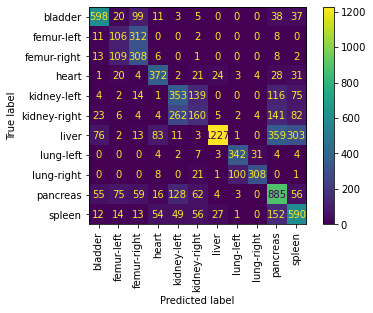

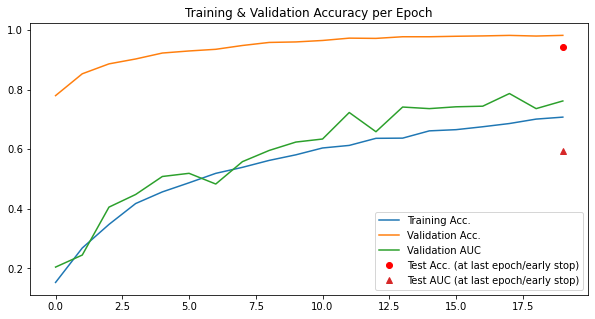

In [49]:
clf = run_classifier_pipeline(
    "organsmnist", info_flags, organsmnist_WSR_GDA,
    DA_technique=DA_technique
)

## 4. Training a Conditional Variational Autoencoder 

We train a Conditional Variational Autoencoder for data augmentation for each of the datasets. 

For each dataset, we then retrain the underlying baseline classifier.

In [50]:
# Declares the Conditional VAE's hyperparameters
latent_dims = 150
epochs = 200

### PathMNIST

#### Training the Conditional VAE

In [52]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pathmnist"
base_dataset = pathmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 3, 28, 28])
Forward pass test:  True
{'loss': tensor(26646.1465, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(26646.0469, grad_fn=<MseLossBackward0>), 'KLD': tensor(-20.0212, grad_fn=<NegBackward0>)}
Loss test:  True
Cuda device:  cuda
Training phase:
Train epoch 1 -- average loss: 86.03148339931644
Validation set loss: 66.993648
Train epoch 2 -- average loss: 62.19562683078341
Validation set loss: 62.088601
Train epoch 3 -- average loss: 53.08028014067878
Validation set loss: 50.344548
Train epoch 4 -- average loss: 48.681226183972974
Validation set loss: 46.076276
Train epoch 5 -- average loss: 45.72913971754322
Validation set loss: 43.496473
Train epoch 6 -- average loss: 43.541585162574066
Validation set loss: 43.337773
Train epoch 7 -- average loss: 41.862527493355174
Validation set loss: 43.723314
Train epoch 8 -- average loss: 40.395047988460945
Validation set lo

Train epoch 97 -- average loss: 19.972902861980497
Validation set loss: 22.138664
Train epoch 98 -- average loss: 19.995290400086574
Validation set loss: 22.268427
Train epoch 99 -- average loss: 19.990328343477593
Validation set loss: 22.251341
Train epoch 100 -- average loss: 19.861918264211265
Validation set loss: 22.046413
Train epoch 101 -- average loss: 19.776498632550986
Validation set loss: 22.225343
Train epoch 102 -- average loss: 19.940566578146203
Validation set loss: 22.334545
Train epoch 103 -- average loss: 19.827751087439825
Validation set loss: 22.288841
Train epoch 104 -- average loss: 19.70945822045487
Validation set loss: 22.342569
Train epoch 105 -- average loss: 19.637848548748433
Validation set loss: 22.29091
==/!\== EARLY STOPPING: no validation loss improvement over the past 5 epochs
Testing phase:
Test set loss: 22.163671


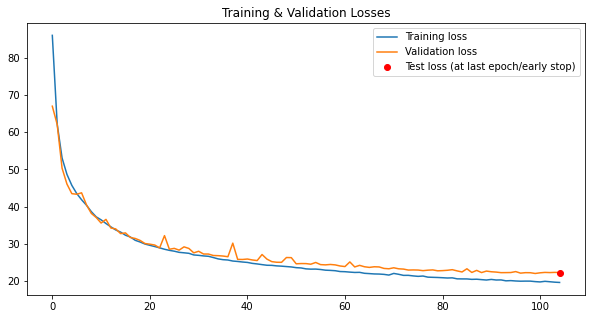

In [7]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [53]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

Number of generated images: 3599 (4% of the dataset)


2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "PathMNIST",
  "description": "The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3\u00d7224\u00d7224 into 3\u00d728\u00d728, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/pathmnist.npz?download=1",
  "MD5": "a8b06965200029087d5bd730944a56c1",
  "task": "multi-class",
  "label": {
    "0": "adipose",
    "1": "background",
    "2": "debris",
    "3": "lymphocytes",
    "4": "mucus",
    "5": "smooth muscle",
    "6": "normal colon mucosa"

100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 95.64it/s]


train -- accuracy: 0.66
val -- accuracy: 0.98,  AUC: 0.79
Epoch 1



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 96.55it/s]


train -- accuracy: 0.82
val -- accuracy: 0.98,  AUC: 0.82
Epoch 2



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 93.90it/s]


train -- accuracy: 0.87
val -- accuracy: 0.99,  AUC: 0.89
Epoch 3



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 96.60it/s]


train -- accuracy: 0.89
val -- accuracy: 0.99,  AUC: 0.88
Epoch 4



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 96.54it/s]


train -- accuracy: 0.9
val -- accuracy: 0.99,  AUC: 0.86
Epoch 5



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 95.13it/s]


train -- accuracy: 0.91
val -- accuracy: 0.99,  AUC: 0.91
Epoch 6



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 94.63it/s]


train -- accuracy: 0.92
val -- accuracy: 1.0,  AUC: 0.93
Epoch 7



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 94.95it/s]


train -- accuracy: 0.93
val -- accuracy: 1.0,  AUC: 0.91
Epoch 8



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 97.22it/s]


train -- accuracy: 0.93
val -- accuracy: 1.0,  AUC: 0.92
Epoch 9



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 97.62it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.93
Epoch 10



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 97.83it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.94
Epoch 11



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 97.62it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.92
Epoch 12



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 96.12it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.95
Epoch 13



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 94.00it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.94
Epoch 14



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 94.67it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.94
Epoch 15



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 95.17it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.94
Epoch 16



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 97.71it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.93
Epoch 17



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 97.85it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.95
Epoch 18



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 98.52it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.95
Epoch 19



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 95.89it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.94
test -- accuracy: 0.97,  AUC: 0.82


<Figure size 720x720 with 0 Axes>

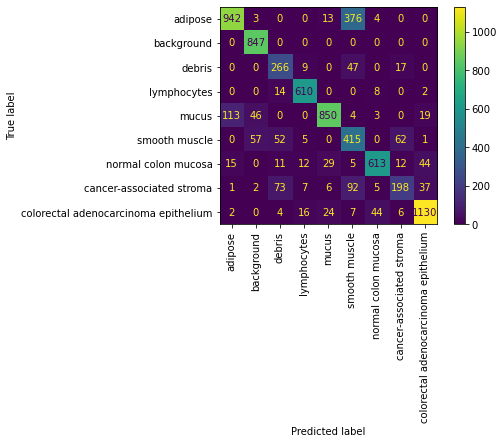

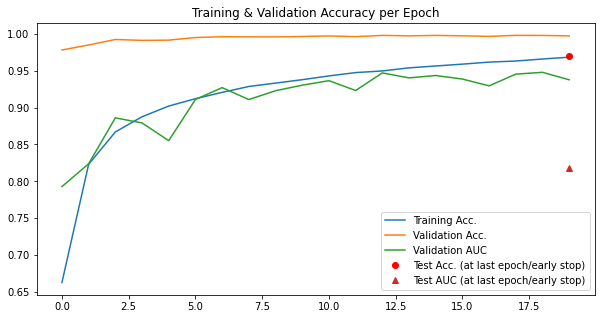

In [54]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [55]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "PathMNIST",
  "description": "The PathMNIST is based on a prior study for predicting survival from colorectal cancer histology slides, providing a dataset (NCT-CRC-HE-100K) of 100,000 non-overlapping image patches from hematoxylin & eosin stained histological images, and a test dataset (CRC-VAL-HE-7K) of 7,180 image patches from a different clinical center. The dataset is comprised of 9 types of tissues, resulting in a multi-class classification task. We resize the source images of 3\u00d7224\u00d7224 into 3\u00d728\u00d728, and split NCT-CRC-HE-100K into training and validation set with a ratio of 9:1. The CRC-VAL-HE-7K is treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/pathmnist.npz?download=1",
  "MD5": "a8b06965200029087d5bd730944a56c1",
  "task": "multi-class",
  "label": {
    "0": "adipose",
    "1": "background",
    "2": "debris",
    "3": "lymphocytes",
    "4": "mucus",
    "5": "smooth muscle",
    "6": "normal colon mucosa"

100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 96.16it/s]


train -- accuracy: 0.65
val -- accuracy: 0.97,  AUC: 0.74
Epoch 1



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 98.30it/s]


train -- accuracy: 0.82
val -- accuracy: 0.98,  AUC: 0.82
Epoch 2



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 98.62it/s]


train -- accuracy: 0.86
val -- accuracy: 0.99,  AUC: 0.84
Epoch 3



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 98.48it/s]


train -- accuracy: 0.89
val -- accuracy: 0.99,  AUC: 0.88
Epoch 4



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 99.26it/s]


train -- accuracy: 0.9
val -- accuracy: 0.99,  AUC: 0.9
Epoch 5



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 96.94it/s]


train -- accuracy: 0.91
val -- accuracy: 0.99,  AUC: 0.88
Epoch 6



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 96.23it/s]


train -- accuracy: 0.92
val -- accuracy: 0.99,  AUC: 0.9
Epoch 7



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 96.72it/s]


train -- accuracy: 0.93
val -- accuracy: 1.0,  AUC: 0.93
Epoch 8



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 99.09it/s]


train -- accuracy: 0.93
val -- accuracy: 1.0,  AUC: 0.92
Epoch 9



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 95.92it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.93
Epoch 10



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 97.05it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.92
Epoch 11



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 97.12it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.93
Epoch 12



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 96.31it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.92
Epoch 13



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 96.87it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.93
Epoch 14



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 98.60it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.94
Epoch 15



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 97.44it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.94
Epoch 16



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 97.65it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.94
Epoch 17



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 96.54it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.94
Epoch 18



100%|███████████████████████████████████████| 1463/1463 [00:14<00:00, 98.12it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.94
Epoch 19



100%|███████████████████████████████████████| 1463/1463 [00:15<00:00, 94.88it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.94
test -- accuracy: 0.97,  AUC: 0.85


<Figure size 720x720 with 0 Axes>

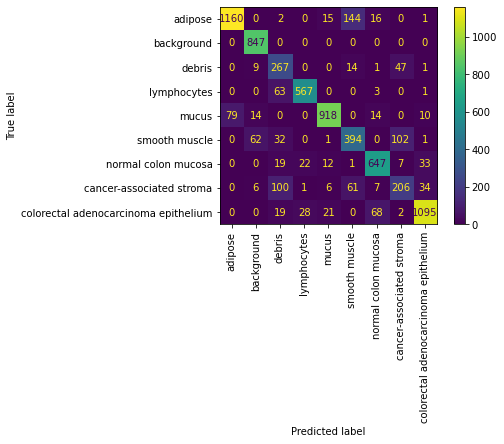

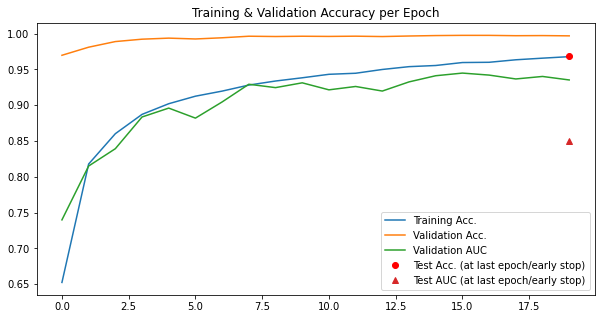

In [56]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### DermaMNIST

#### Training the Conditional VAE

In [57]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "dermamnist"
base_dataset = dermamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 3, 28, 28])
Forward pass test:  True
{'loss': tensor(26745.2617, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(26745.1621, grad_fn=<MseLossBackward0>), 'KLD': tensor(-20.0586, grad_fn=<NegBackward0>)}
Loss test:  True
Cuda device:  cuda
Training phase:
Train epoch 1 -- average loss: 130.00432610079653
Validation set loss: 81.394848
Train epoch 2 -- average loss: 53.71683230971038
Validation set loss: 52.670733
Train epoch 3 -- average loss: 41.863740716593675
Validation set loss: 34.427116
Train epoch 4 -- average loss: 32.07389907107402
Validation set loss: 28.549798
Train epoch 5 -- average loss: 28.15626728182532
Validation set loss: 26.355714
Train epoch 6 -- average loss: 26.613163622092195
Validation set loss: 22.328216
Train epoch 7 -- average loss: 24.882499336600898
Validation set loss: 25.406387
Train epoch 8 -- average loss: 23.39594504964901
Validation set lo

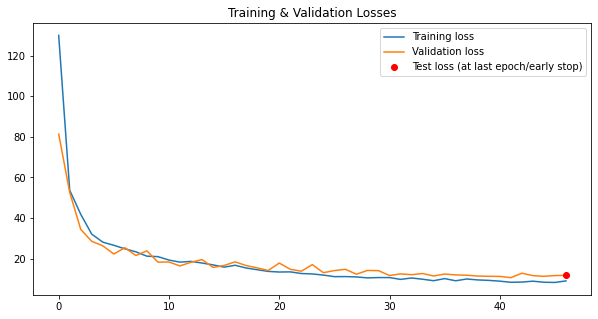

In [58]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [59]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

Number of generated images: 700 (10% of the dataset)


2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "DermaMNIST",
  "description": "The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3\u00d7600\u00d7450 are resized into 3\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/dermamnist.npz?download=1",
  "MD5": "0744692d530f8e62ec473284d019b0c7",
  "task": "multi-class",
  "label": {
    "0": "actinic keratoses and intraepithelial carcinoma",
    "1": "basal cell carcinoma",
    "2": "benign keratosis-like lesions",
    "3": "dermatofibroma",
    "4": "melanoma",
    "5": "melanocytic nevi",
    "6": "vascular lesions"
  },
  "n_channels": 3,
  "n_samples": {
    "train": 7007,
    "val": 1003,
    "test": 2005
  },
  "license": "CC B

100%|████████████████████████████████████████| 121/121 [00:01<00:00, 105.14it/s]


train -- accuracy: 0.62
val -- accuracy: 0.82,  AUC: 0.67
Epoch 1



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 103.63it/s]


train -- accuracy: 0.63
val -- accuracy: 0.87,  AUC: 0.67
Epoch 2



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 100.88it/s]


train -- accuracy: 0.64
val -- accuracy: 0.87,  AUC: 0.68
Epoch 3



100%|█████████████████████████████████████████| 121/121 [00:01<00:00, 98.76it/s]


train -- accuracy: 0.66
val -- accuracy: 0.89,  AUC: 0.71
Epoch 4



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 101.05it/s]


train -- accuracy: 0.68
val -- accuracy: 0.88,  AUC: 0.72
Epoch 5



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 102.45it/s]


train -- accuracy: 0.69
val -- accuracy: 0.9,  AUC: 0.73
Epoch 6



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 100.55it/s]


train -- accuracy: 0.7
val -- accuracy: 0.9,  AUC: 0.72
Epoch 7



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 101.72it/s]


train -- accuracy: 0.71
val -- accuracy: 0.91,  AUC: 0.74
Epoch 8



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 102.07it/s]


train -- accuracy: 0.72
val -- accuracy: 0.9,  AUC: 0.72
Epoch 9



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 101.19it/s]


train -- accuracy: 0.73
val -- accuracy: 0.9,  AUC: 0.72
Epoch 10



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 101.31it/s]


train -- accuracy: 0.73
val -- accuracy: 0.9,  AUC: 0.74
Epoch 11



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 101.96it/s]


train -- accuracy: 0.75
val -- accuracy: 0.91,  AUC: 0.71
Epoch 12



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 102.00it/s]


train -- accuracy: 0.76
val -- accuracy: 0.92,  AUC: 0.75
Epoch 13



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 102.28it/s]


train -- accuracy: 0.76
val -- accuracy: 0.91,  AUC: 0.73
Epoch 14



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 102.29it/s]


train -- accuracy: 0.77
val -- accuracy: 0.91,  AUC: 0.74
Epoch 15



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 102.24it/s]


train -- accuracy: 0.79
val -- accuracy: 0.92,  AUC: 0.73
Epoch 16



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 102.55it/s]


train -- accuracy: 0.8
val -- accuracy: 0.92,  AUC: 0.74
Epoch 17



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 101.45it/s]


train -- accuracy: 0.81
val -- accuracy: 0.92,  AUC: 0.75
Epoch 18



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 102.52it/s]


train -- accuracy: 0.82
val -- accuracy: 0.91,  AUC: 0.71
Epoch 19



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 102.37it/s]


train -- accuracy: 0.84
val -- accuracy: 0.91,  AUC: 0.7
test -- accuracy: 0.91,  AUC: 0.69


<Figure size 720x720 with 0 Axes>

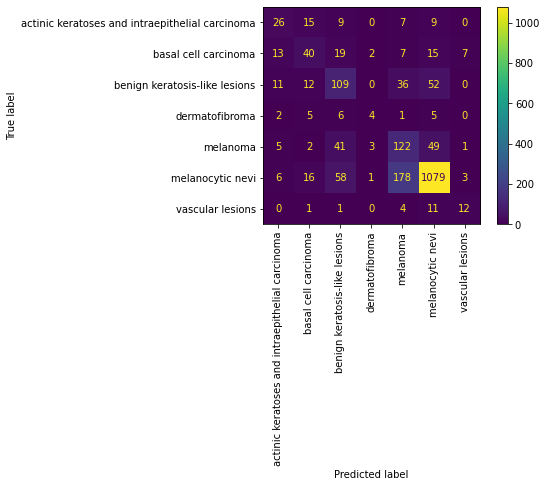

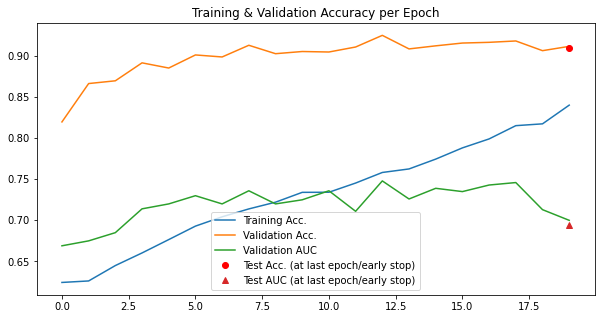

In [60]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [61]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "DermaMNIST",
  "description": "The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3\u00d7600\u00d7450 are resized into 3\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/dermamnist.npz?download=1",
  "MD5": "0744692d530f8e62ec473284d019b0c7",
  "task": "multi-class",
  "label": {
    "0": "actinic keratoses and intraepithelial carcinoma",
    "1": "basal cell carcinoma",
    "2": "benign keratosis-like lesions",
    "3": "dermatofibroma",
    "4": "melanoma",
    "5": "melanocytic nevi",
    "6": "vascular lesions"
  },
  "n_channels": 3,
  "n_samples": {
    "train": 7007,
    "val": 1003,
    "test": 2005
  },
  "license": "CC B

100%|████████████████████████████████████████| 121/121 [00:01<00:00, 110.76it/s]


train -- accuracy: 0.3
val -- accuracy: 0.8,  AUC: 0.4
Epoch 1



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 109.39it/s]


train -- accuracy: 0.46
val -- accuracy: 0.86,  AUC: 0.58
Epoch 2



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 109.19it/s]


train -- accuracy: 0.53
val -- accuracy: 0.88,  AUC: 0.6
Epoch 3



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 103.13it/s]


train -- accuracy: 0.59
val -- accuracy: 0.89,  AUC: 0.59
Epoch 4



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 108.91it/s]


train -- accuracy: 0.62
val -- accuracy: 0.88,  AUC: 0.66
Epoch 5



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 110.12it/s]


train -- accuracy: 0.67
val -- accuracy: 0.89,  AUC: 0.59
Epoch 6



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 107.29it/s]


train -- accuracy: 0.71
val -- accuracy: 0.9,  AUC: 0.65
Epoch 7



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 107.23it/s]


train -- accuracy: 0.75
val -- accuracy: 0.9,  AUC: 0.66
Epoch 8



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 111.17it/s]


train -- accuracy: 0.79
val -- accuracy: 0.89,  AUC: 0.6
Epoch 9



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 110.49it/s]


train -- accuracy: 0.83
val -- accuracy: 0.89,  AUC: 0.64
Epoch 10



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 111.75it/s]


train -- accuracy: 0.85
val -- accuracy: 0.89,  AUC: 0.62
Epoch 11



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 110.49it/s]


train -- accuracy: 0.87
val -- accuracy: 0.89,  AUC: 0.64
Epoch 12



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 111.59it/s]


train -- accuracy: 0.89
val -- accuracy: 0.88,  AUC: 0.59
Epoch 13



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 109.69it/s]


train -- accuracy: 0.9
val -- accuracy: 0.88,  AUC: 0.55
Epoch 14



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 111.29it/s]


train -- accuracy: 0.91
val -- accuracy: 0.89,  AUC: 0.66
Epoch 15



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 111.23it/s]


train -- accuracy: 0.92
val -- accuracy: 0.89,  AUC: 0.68
Epoch 16



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 110.97it/s]


train -- accuracy: 0.93
val -- accuracy: 0.89,  AUC: 0.64
Epoch 17



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 110.93it/s]


train -- accuracy: 0.94
val -- accuracy: 0.9,  AUC: 0.65
Epoch 18



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 110.65it/s]


train -- accuracy: 0.95
val -- accuracy: 0.89,  AUC: 0.69
Epoch 19



100%|████████████████████████████████████████| 121/121 [00:01<00:00, 109.94it/s]


train -- accuracy: 0.95
val -- accuracy: 0.9,  AUC: 0.71
test -- accuracy: 0.9,  AUC: 0.72


<Figure size 720x720 with 0 Axes>

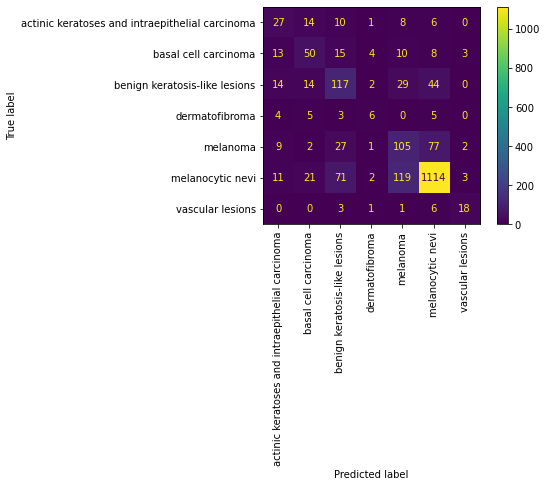

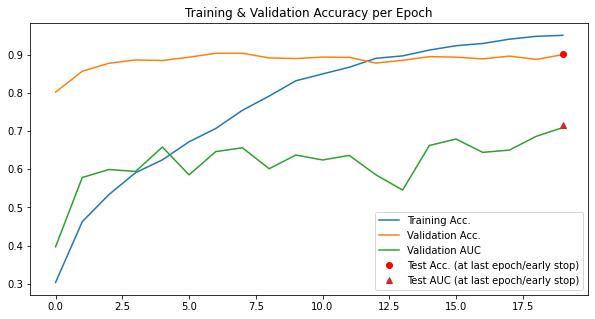

In [62]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OctMNIST

#### Training the Conditional VAE

In [63]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "octmnist"
base_dataset = octmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 1, 28, 28])
Forward pass test:  True
{'loss': tensor(9126.1826, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(9126.0869, grad_fn=<MseLossBackward0>), 'KLD': tensor(-19.1678, grad_fn=<NegBackward0>)}
Loss test:  True
Cuda device:  cuda
Training phase:
Train epoch 1 -- average loss: 19.53721921160729
Validation set loss: 8.334145
Train epoch 2 -- average loss: 7.233821851559975
Validation set loss: 5.566469
Train epoch 3 -- average loss: 5.337069534747419
Validation set loss: 4.472169
Train epoch 4 -- average loss: 4.26380370150143
Validation set loss: 3.516816
Train epoch 5 -- average loss: 3.7459836939273776
Validation set loss: 3.569156
Train epoch 6 -- average loss: 3.3990540673466962
Validation set loss: 2.796929
Train epoch 7 -- average loss: 3.106732538772067
Validation set loss: 2.690751
Train epoch 8 -- average loss: 2.8521910920745746
Validation set loss: 2.44634

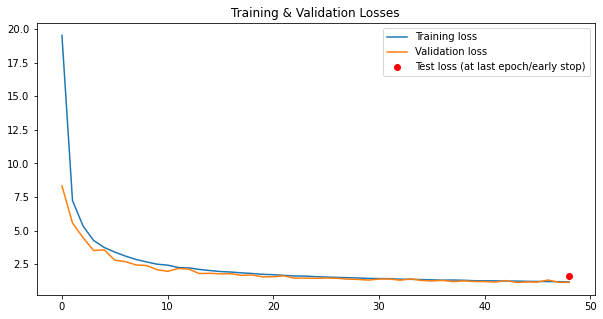

In [64]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [65]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

Number of generated images: 3899 (4% of the dataset)


2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "OCTMNIST",
  "description": "The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22121,536)\u00d7(277\u2212512). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/octmnist.npz?download=1",
  "MD5": "c68d92d5b585d8d81f7112f81e2d0842",
  "task": "multi-class",
  "label": {
    "0": "choroidal neovascularization",
    "1": "diabetic macular edema",
    "2": "drusen",
    "3": "normal"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 97477,
    "val": 10832,
    "test": 1000
  },
  "license": "CC BY 4.0"
}
--------------------------------

100%|██████████████████████████████████████| 1584/1584 [00:14<00:00, 107.85it/s]


train -- accuracy: 0.79
val -- accuracy: 0.93,  AUC: 0.85
Epoch 1



100%|██████████████████████████████████████| 1584/1584 [00:14<00:00, 105.74it/s]


train -- accuracy: 0.85
val -- accuracy: 0.95,  AUC: 0.88
Epoch 2



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 102.79it/s]


train -- accuracy: 0.87
val -- accuracy: 0.96,  AUC: 0.88
Epoch 3



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 103.24it/s]


train -- accuracy: 0.88
val -- accuracy: 0.96,  AUC: 0.88
Epoch 4



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 102.53it/s]


train -- accuracy: 0.89
val -- accuracy: 0.97,  AUC: 0.9
Epoch 5



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 104.20it/s]


train -- accuracy: 0.9
val -- accuracy: 0.96,  AUC: 0.89
Epoch 6



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 102.06it/s]


train -- accuracy: 0.91
val -- accuracy: 0.96,  AUC: 0.88
Epoch 7



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 105.37it/s]


train -- accuracy: 0.91
val -- accuracy: 0.97,  AUC: 0.9
Epoch 8



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 104.33it/s]


train -- accuracy: 0.92
val -- accuracy: 0.97,  AUC: 0.91
Epoch 9



100%|██████████████████████████████████████| 1584/1584 [00:14<00:00, 106.28it/s]


train -- accuracy: 0.93
val -- accuracy: 0.97,  AUC: 0.9
Epoch 10



100%|██████████████████████████████████████| 1584/1584 [00:14<00:00, 106.25it/s]


train -- accuracy: 0.93
val -- accuracy: 0.96,  AUC: 0.89
Epoch 11



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 104.85it/s]


train -- accuracy: 0.94
val -- accuracy: 0.96,  AUC: 0.89
Epoch 12



100%|███████████████████████████████████████| 1584/1584 [00:16<00:00, 98.31it/s]


train -- accuracy: 0.94
val -- accuracy: 0.97,  AUC: 0.9
Epoch 13



100%|██████████████████████████████████████| 1584/1584 [00:14<00:00, 109.08it/s]


train -- accuracy: 0.94
val -- accuracy: 0.97,  AUC: 0.9
Epoch 14



100%|██████████████████████████████████████| 1584/1584 [00:14<00:00, 110.45it/s]


train -- accuracy: 0.95
val -- accuracy: 0.97,  AUC: 0.91
Epoch 15



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 104.38it/s]


train -- accuracy: 0.95
val -- accuracy: 0.97,  AUC: 0.91
Epoch 16



100%|██████████████████████████████████████| 1584/1584 [00:14<00:00, 111.01it/s]


train -- accuracy: 0.95
val -- accuracy: 0.97,  AUC: 0.91
Epoch 17



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 101.34it/s]


train -- accuracy: 0.96
val -- accuracy: 0.97,  AUC: 0.91
Epoch 18



100%|███████████████████████████████████████| 1584/1584 [00:15<00:00, 99.99it/s]


train -- accuracy: 0.96
val -- accuracy: 0.97,  AUC: 0.9
Epoch 19



100%|██████████████████████████████████████| 1584/1584 [00:14<00:00, 106.35it/s]


train -- accuracy: 0.96
val -- accuracy: 0.97,  AUC: 0.91
test -- accuracy: 0.93,  AUC: 0.7


<Figure size 720x720 with 0 Axes>

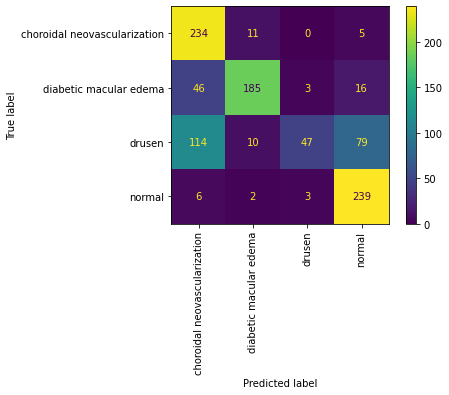

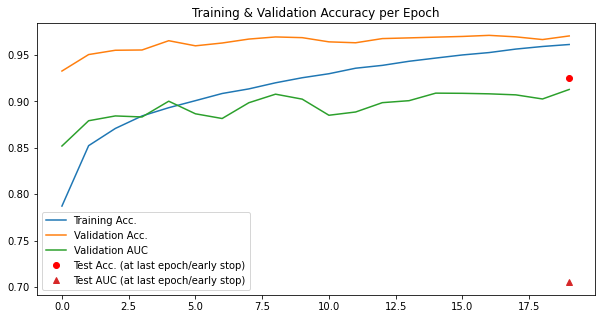

In [66]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [67]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "OCTMNIST",
  "description": "The OCTMNIST is based on a prior dataset of 109,309 valid optical coherence tomography (OCT) images for retinal diseases. The dataset is comprised of 4 diagnosis categories, leading to a multi-class classification task. We split the source training set with a ratio of 9:1 into training and validation set, and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22121,536)\u00d7(277\u2212512). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/octmnist.npz?download=1",
  "MD5": "c68d92d5b585d8d81f7112f81e2d0842",
  "task": "multi-class",
  "label": {
    "0": "choroidal neovascularization",
    "1": "diabetic macular edema",
    "2": "drusen",
    "3": "normal"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 97477,
    "val": 10832,
    "test": 1000
  },
  "license": "CC BY 4.0"
}
--------------------------------

100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 104.61it/s]


train -- accuracy: 0.67
val -- accuracy: 0.93,  AUC: 0.79
Epoch 1



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 105.54it/s]


train -- accuracy: 0.8
val -- accuracy: 0.94,  AUC: 0.77
Epoch 2



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 103.06it/s]


train -- accuracy: 0.83
val -- accuracy: 0.96,  AUC: 0.87
Epoch 3



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 102.10it/s]


train -- accuracy: 0.86
val -- accuracy: 0.96,  AUC: 0.88
Epoch 4



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 100.50it/s]


train -- accuracy: 0.88
val -- accuracy: 0.95,  AUC: 0.84
Epoch 5



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 101.23it/s]


train -- accuracy: 0.89
val -- accuracy: 0.97,  AUC: 0.86
Epoch 6



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 101.98it/s]


train -- accuracy: 0.91
val -- accuracy: 0.96,  AUC: 0.84
Epoch 7



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 103.32it/s]


train -- accuracy: 0.92
val -- accuracy: 0.96,  AUC: 0.89
Epoch 8



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 103.17it/s]


train -- accuracy: 0.92
val -- accuracy: 0.97,  AUC: 0.83
Epoch 9



100%|███████████████████████████████████████| 1584/1584 [00:15<00:00, 99.10it/s]


train -- accuracy: 0.93
val -- accuracy: 0.96,  AUC: 0.87
Epoch 10



100%|███████████████████████████████████████| 1584/1584 [00:15<00:00, 99.21it/s]


train -- accuracy: 0.94
val -- accuracy: 0.97,  AUC: 0.87
Epoch 11



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 103.30it/s]


train -- accuracy: 0.94
val -- accuracy: 0.97,  AUC: 0.85
Epoch 12



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 102.20it/s]


train -- accuracy: 0.95
val -- accuracy: 0.97,  AUC: 0.9
Epoch 13



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 103.46it/s]


train -- accuracy: 0.95
val -- accuracy: 0.97,  AUC: 0.89
Epoch 14



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 103.42it/s]


train -- accuracy: 0.96
val -- accuracy: 0.97,  AUC: 0.9
Epoch 15



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 102.85it/s]


train -- accuracy: 0.96
val -- accuracy: 0.96,  AUC: 0.9
Epoch 16



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 101.69it/s]


train -- accuracy: 0.96
val -- accuracy: 0.96,  AUC: 0.87
Epoch 17



100%|███████████████████████████████████████| 1584/1584 [00:15<00:00, 99.85it/s]


train -- accuracy: 0.97
val -- accuracy: 0.96,  AUC: 0.87
Epoch 18



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 103.51it/s]


train -- accuracy: 0.97
val -- accuracy: 0.96,  AUC: 0.89
Epoch 19



100%|██████████████████████████████████████| 1584/1584 [00:15<00:00, 105.14it/s]


train -- accuracy: 0.97
val -- accuracy: 0.96,  AUC: 0.85
test -- accuracy: 0.91,  AUC: 0.69


<Figure size 720x720 with 0 Axes>

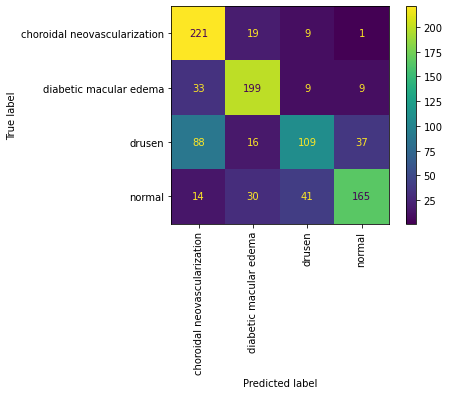

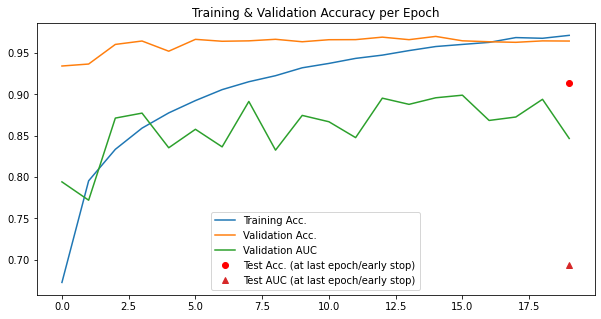

In [68]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### PneumoniaMNIST

#### Training the Conditional VAE

In [69]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pneumoniamnist"
base_dataset = pneumoniamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 1, 28, 28])
Forward pass test:  True
{'loss': tensor(8718.3467, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(8718.2480, grad_fn=<MseLossBackward0>), 'KLD': tensor(-19.6374, grad_fn=<NegBackward0>)}
Loss test:  True
Cuda device:  cuda
Training phase:
Train epoch 1 -- average loss: 51.021619928014815
Validation set loss: 29.141819
Train epoch 2 -- average loss: 23.80162039264948
Validation set loss: 18.265114
Train epoch 3 -- average loss: 16.355085944967342
Validation set loss: 13.637569
Train epoch 4 -- average loss: 13.34991159495805
Validation set loss: 11.987748
Train epoch 5 -- average loss: 11.447407141517763
Validation set loss: 11.586944
Train epoch 6 -- average loss: 9.980835751749847
Validation set loss: 8.717211
Train epoch 7 -- average loss: 9.10332562261045
Validation set loss: 8.219842
Train epoch 8 -- average loss: 7.8968904506582875
Validation set loss: 7

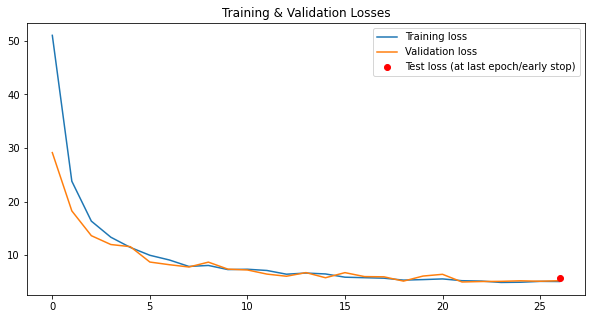

In [70]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [71]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

Number of generated images: 470 (10% of the dataset)


2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "PneumoniaMNIST",
  "description": "The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22122,916)\u00d7(127\u22122,713). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/pneumoniamnist.npz?download=1",
  "MD5": "28209eda62fecd6e6a2d98b1501bb15f",
  "task": "binary-class",
  "label": {
    "0": "normal",
    "1": "pneumonia"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 4708,
    "val": 524,
    "test": 624
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           

100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 109.28it/s]


train -- accuracy: 0.81
val -- accuracy: 0.97,  AUC: 0.93
Epoch 1



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 109.02it/s]


train -- accuracy: 0.93
val -- accuracy: 0.99,  AUC: 0.95
Epoch 2



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 109.35it/s]


train -- accuracy: 0.95
val -- accuracy: 0.99,  AUC: 0.96
Epoch 3



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 108.70it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.97
Epoch 4



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 106.84it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.97
Epoch 5



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 108.22it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.98
Epoch 6



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 109.51it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.97
Epoch 7



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 109.60it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.98
Epoch 8



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 108.98it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.98
Epoch 9



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 109.09it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.98
Epoch 10



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 109.81it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 11



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 110.34it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.98
Epoch 12



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 108.62it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.98
Epoch 13



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 107.95it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.98
Epoch 14



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 108.35it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.98
Epoch 15



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 107.92it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.98
Epoch 16



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 108.33it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.98
Epoch 17



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 109.03it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 18



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 109.34it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.98
Epoch 19



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 109.13it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.98
test -- accuracy: 0.97,  AUC: 0.88


<Figure size 720x720 with 0 Axes>

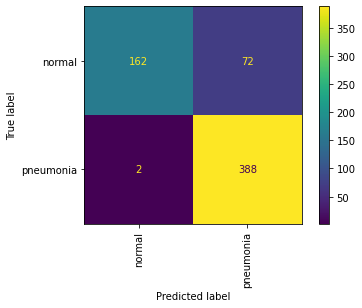

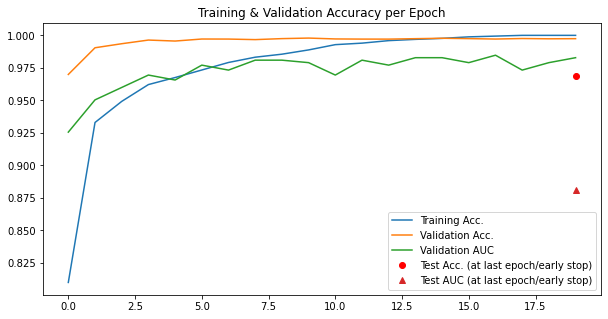

In [72]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [73]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "PneumoniaMNIST",
  "description": "The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384\u22122,916)\u00d7(127\u22122,713). We center-crop the images and resize them into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/pneumoniamnist.npz?download=1",
  "MD5": "28209eda62fecd6e6a2d98b1501bb15f",
  "task": "binary-class",
  "label": {
    "0": "normal",
    "1": "pneumonia"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 4708,
    "val": 524,
    "test": 624
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           

100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 106.40it/s]


train -- accuracy: 0.82
val -- accuracy: 0.98,  AUC: 0.92
Epoch 1



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 106.26it/s]


train -- accuracy: 0.94
val -- accuracy: 0.99,  AUC: 0.94
Epoch 2



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 106.73it/s]


train -- accuracy: 0.95
val -- accuracy: 0.99,  AUC: 0.94
Epoch 3



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 102.19it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.98
Epoch 4



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 105.91it/s]


train -- accuracy: 0.97
val -- accuracy: 0.99,  AUC: 0.97
Epoch 5



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 105.97it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.97
Epoch 6



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 105.03it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.97
Epoch 7



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 105.76it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 8



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 102.26it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 9



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 106.71it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.98
Epoch 10



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 106.53it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 11



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 108.08it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 12



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 107.55it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 13



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 108.24it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 14



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 107.25it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 15



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 107.89it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.98
Epoch 16



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 107.21it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 17



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 106.96it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 18



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 108.22it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 19



100%|██████████████████████████████████████████| 81/81 [00:00<00:00, 107.58it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
test -- accuracy: 0.95,  AUC: 0.87


<Figure size 720x720 with 0 Axes>

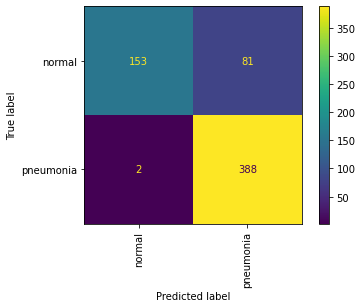

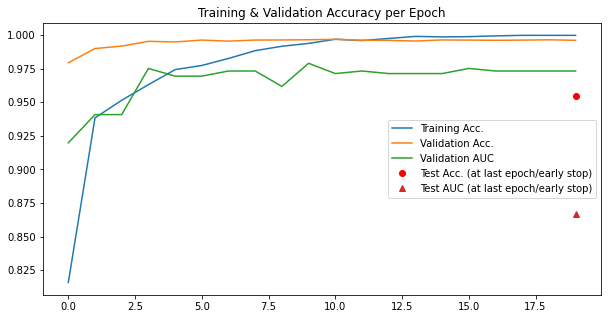

In [74]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### BreastMNIST

#### Training the Conditional VAE

In [75]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "breastmnist"
base_dataset = breastmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 1, 28, 28])
Forward pass test:  True
{'loss': tensor(8242.1406, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(8242.0479, grad_fn=<MseLossBackward0>), 'KLD': tensor(-18.6498, grad_fn=<NegBackward0>)}
Loss test:  True
Cuda device:  cuda
Training phase:
Train epoch 1 -- average loss: 196.05818058894232
Validation set loss: 174.947867
Train epoch 2 -- average loss: 84.64344826722757
Validation set loss: 134.661195
Train epoch 3 -- average loss: 65.36123601333563
Validation set loss: 135.103128
Train epoch 4 -- average loss: 54.10938662574405
Validation set loss: 103.47824
Train epoch 5 -- average loss: 49.69551751552484
Validation set loss: 62.366211
Train epoch 6 -- average loss: 47.96497699891255
Validation set loss: 50.315445
Train epoch 7 -- average loss: 42.26672072637649
Validation set loss: 42.83211
Train epoch 8 -- average loss: 40.45967968392285
Validation set loss:

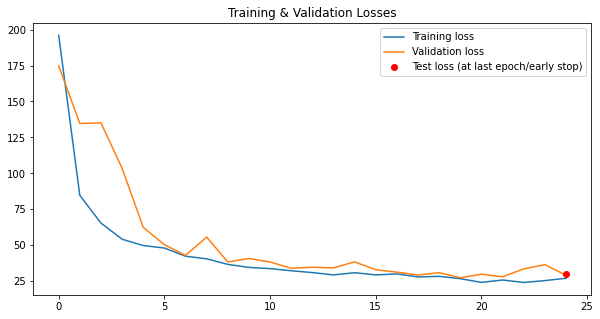

In [76]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [77]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

Number of generated images: 54 (10% of the dataset)


2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "BreastMNIST",
  "description": "The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1\u00d7500\u00d7500 are resized into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/breastmnist.npz?download=1",
  "MD5": "750601b1f35ba3300ea97c75c52ff8f6",
  "task": "binary-class",
  "label": {
    "0": "malignant",
    "1": "normal, benign"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 546,
    "val": 78,
    "test": 156
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
    

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 106.82it/s]


train -- accuracy: 0.61
val -- accuracy: 0.71,  AUC: 0.73
Epoch 1



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 111.34it/s]


train -- accuracy: 0.73
val -- accuracy: 0.71,  AUC: 0.73
Epoch 2



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 111.07it/s]


train -- accuracy: 0.73
val -- accuracy: 0.67,  AUC: 0.73
Epoch 3



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 113.53it/s]


train -- accuracy: 0.73
val -- accuracy: 0.69,  AUC: 0.73
Epoch 4



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.56it/s]


train -- accuracy: 0.73
val -- accuracy: 0.72,  AUC: 0.73
Epoch 5



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.69it/s]


train -- accuracy: 0.73
val -- accuracy: 0.73,  AUC: 0.73
Epoch 6



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 113.53it/s]


train -- accuracy: 0.73
val -- accuracy: 0.74,  AUC: 0.73
Epoch 7



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 109.84it/s]


train -- accuracy: 0.73
val -- accuracy: 0.76,  AUC: 0.73
Epoch 8



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 113.96it/s]


train -- accuracy: 0.73
val -- accuracy: 0.77,  AUC: 0.73
Epoch 9



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.05it/s]


train -- accuracy: 0.73
val -- accuracy: 0.78,  AUC: 0.73
Epoch 10



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 111.69it/s]


train -- accuracy: 0.74
val -- accuracy: 0.79,  AUC: 0.73
Epoch 11



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 107.53it/s]


train -- accuracy: 0.74
val -- accuracy: 0.8,  AUC: 0.74
Epoch 12



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.33it/s]


train -- accuracy: 0.75
val -- accuracy: 0.81,  AUC: 0.76
Epoch 13



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 110.29it/s]


train -- accuracy: 0.76
val -- accuracy: 0.81,  AUC: 0.78
Epoch 14



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 110.41it/s]


train -- accuracy: 0.77
val -- accuracy: 0.82,  AUC: 0.78
Epoch 15



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.49it/s]


train -- accuracy: 0.79
val -- accuracy: 0.83,  AUC: 0.79
Epoch 16



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 111.45it/s]


train -- accuracy: 0.8
val -- accuracy: 0.84,  AUC: 0.81
Epoch 17



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 114.58it/s]


train -- accuracy: 0.81
val -- accuracy: 0.85,  AUC: 0.82
Epoch 18



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 111.32it/s]


train -- accuracy: 0.83
val -- accuracy: 0.86,  AUC: 0.82
Epoch 19



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.11it/s]

train -- accuracy: 0.83
val -- accuracy: 0.87,  AUC: 0.83
test -- accuracy: 0.85,  AUC: 0.79


<Figure size 720x720 with 0 Axes>

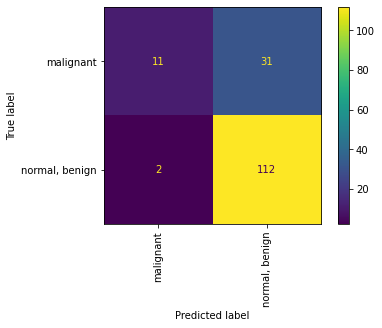

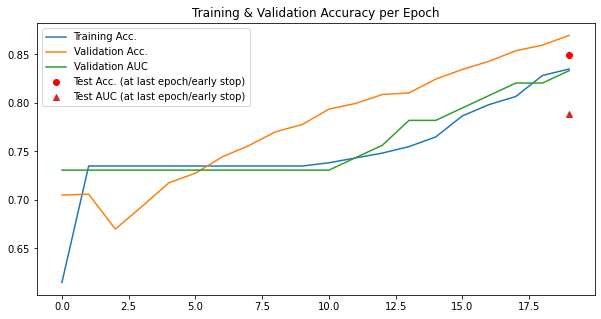

In [78]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [79]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "BreastMNIST",
  "description": "The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1\u00d7500\u00d7500 are resized into 1\u00d728\u00d728.",
  "url": "https://zenodo.org/record/5208230/files/breastmnist.npz?download=1",
  "MD5": "750601b1f35ba3300ea97c75c52ff8f6",
  "task": "binary-class",
  "label": {
    "0": "malignant",
    "1": "normal, benign"
  },
  "n_channels": 1,
  "n_samples": {
    "train": 546,
    "val": 78,
    "test": 156
  },
  "license": "CC BY 4.0"
}
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
    

100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 109.87it/s]


train -- accuracy: 0.48
val -- accuracy: 0.63,  AUC: 0.73
Epoch 1



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.17it/s]


train -- accuracy: 0.52
val -- accuracy: 0.63,  AUC: 0.73
Epoch 2



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 114.04it/s]


train -- accuracy: 0.66
val -- accuracy: 0.71,  AUC: 0.72
Epoch 3



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.29it/s]


train -- accuracy: 0.7
val -- accuracy: 0.75,  AUC: 0.76
Epoch 4



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.20it/s]


train -- accuracy: 0.67
val -- accuracy: 0.78,  AUC: 0.74
Epoch 5



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.72it/s]


train -- accuracy: 0.68
val -- accuracy: 0.8,  AUC: 0.77
Epoch 6



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.66it/s]


train -- accuracy: 0.73
val -- accuracy: 0.81,  AUC: 0.77
Epoch 7



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 114.27it/s]


train -- accuracy: 0.7
val -- accuracy: 0.81,  AUC: 0.77
Epoch 8



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 111.07it/s]


train -- accuracy: 0.72
val -- accuracy: 0.81,  AUC: 0.79
Epoch 9



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 113.50it/s]


train -- accuracy: 0.75
val -- accuracy: 0.82,  AUC: 0.78
Epoch 10



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 111.47it/s]


train -- accuracy: 0.78
val -- accuracy: 0.82,  AUC: 0.78
Epoch 11



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 111.41it/s]


train -- accuracy: 0.77
val -- accuracy: 0.85,  AUC: 0.78
Epoch 12



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.78it/s]


train -- accuracy: 0.79
val -- accuracy: 0.85,  AUC: 0.78
Epoch 13



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 110.96it/s]


train -- accuracy: 0.82
val -- accuracy: 0.86,  AUC: 0.77
Epoch 14



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.16it/s]


train -- accuracy: 0.88
val -- accuracy: 0.87,  AUC: 0.77
Epoch 15



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 114.30it/s]


train -- accuracy: 0.85
val -- accuracy: 0.87,  AUC: 0.78
Epoch 16



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 110.80it/s]


train -- accuracy: 0.89
val -- accuracy: 0.88,  AUC: 0.81
Epoch 17



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 111.96it/s]


train -- accuracy: 0.93
val -- accuracy: 0.89,  AUC: 0.77
Epoch 18



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 112.15it/s]


train -- accuracy: 0.91
val -- accuracy: 0.9,  AUC: 0.81
Epoch 19



100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 114.25it/s]


train -- accuracy: 0.95
val -- accuracy: 0.9,  AUC: 0.85
test -- accuracy: 0.86,  AUC: 0.79


<Figure size 720x720 with 0 Axes>

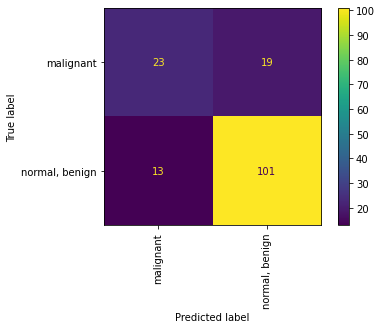

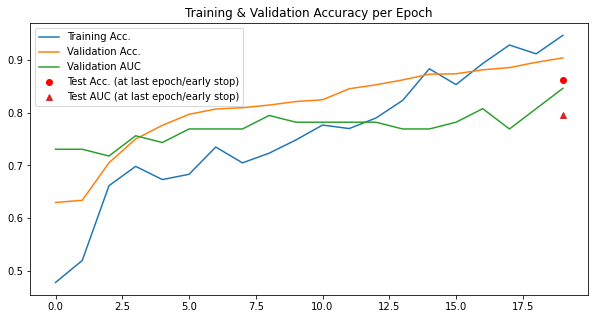

In [80]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OrganaMNIST

#### Training the Conditional VAE

In [81]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organamnist"
base_dataset = organamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 1, 28, 28])
Forward pass test:  True
{'loss': tensor(8672.7139, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(8672.6211, grad_fn=<MseLossBackward0>), 'KLD': tensor(-18.5868, grad_fn=<NegBackward0>)}
Loss test:  True
Cuda device:  cuda
Training phase:
Train epoch 1 -- average loss: 109.14906746767328
Validation set loss: 93.103067
Train epoch 2 -- average loss: 69.89400843140471
Validation set loss: 73.177671
Train epoch 3 -- average loss: 59.06853817918551
Validation set loss: 67.700299
Train epoch 4 -- average loss: 53.639313498674305
Validation set loss: 64.907409
Train epoch 5 -- average loss: 49.65345338223686
Validation set loss: 62.648891
Train epoch 6 -- average loss: 47.109659724829704
Validation set loss: 60.400081
Train epoch 7 -- average loss: 44.22831594979507
Validation set loss: 59.79712
Train epoch 8 -- average loss: 43.134475562837295
Validation set loss:

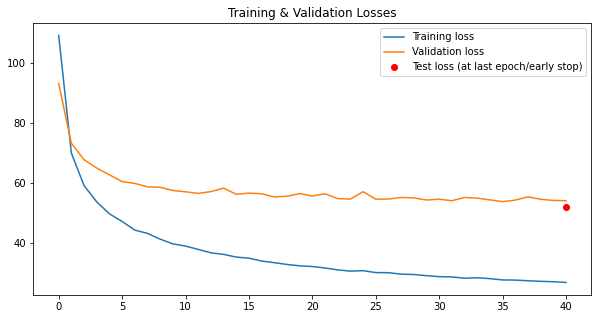

In [82]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [83]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 5
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

Number of generated images: 1729 (5% of the dataset)


2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "OrganAMNIST",
  "description": "The OrganAMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Axial (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in axial views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organamnist.npz?download=1",
  "MD5": "866b832ed4eeba67bfb9edee1d5544e6",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-left",

100%|█████████████████████████████████████████| 568/568 [00:05<00:00, 97.86it/s]


train -- accuracy: 0.59
val -- accuracy: 0.99,  AUC: 0.9
Epoch 1



100%|█████████████████████████████████████████| 568/568 [00:06<00:00, 94.14it/s]


train -- accuracy: 0.86
val -- accuracy: 1.0,  AUC: 0.94
Epoch 2



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 100.17it/s]


train -- accuracy: 0.92
val -- accuracy: 1.0,  AUC: 0.96
Epoch 3



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 109.06it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.96
Epoch 4



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 111.45it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.97
Epoch 5



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 114.20it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.96
Epoch 6



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 110.83it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.97
Epoch 7



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 104.19it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 8



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 111.24it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 9



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 103.15it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 10



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 107.27it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 11



100%|█████████████████████████████████████████| 568/568 [00:06<00:00, 94.37it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 12



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 100.45it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.98
Epoch 13



100%|█████████████████████████████████████████| 568/568 [00:05<00:00, 98.01it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 14



100%|█████████████████████████████████████████| 568/568 [00:05<00:00, 99.87it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 15



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 100.78it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 16



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 102.75it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 17



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 107.96it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 18



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.51it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 19



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.46it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
test -- accuracy: 0.99,  AUC: 0.88


<Figure size 720x720 with 0 Axes>

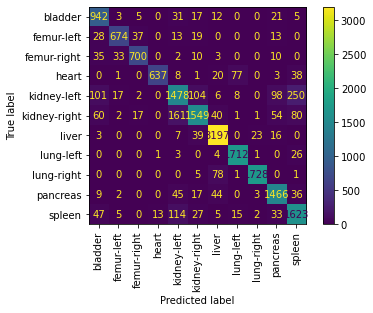

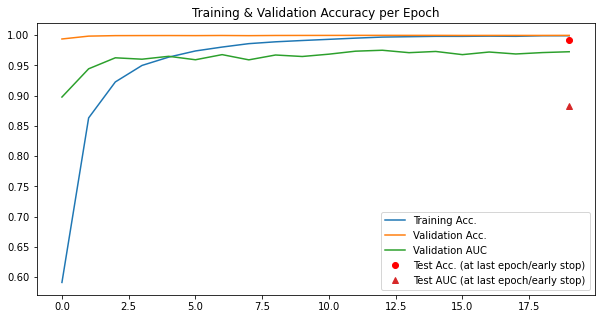

In [84]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [85]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "OrganAMNIST",
  "description": "The OrganAMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Axial (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in axial views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organamnist.npz?download=1",
  "MD5": "866b832ed4eeba67bfb9edee1d5544e6",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-left",

100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.89it/s]


train -- accuracy: 0.58
val -- accuracy: 0.99,  AUC: 0.91
Epoch 1



100%|████████████████████████████████████████| 568/568 [00:05<00:00, 112.58it/s]


train -- accuracy: 0.86
val -- accuracy: 1.0,  AUC: 0.94
Epoch 2



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 115.63it/s]


train -- accuracy: 0.92
val -- accuracy: 1.0,  AUC: 0.97
Epoch 3



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.90it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.97
Epoch 4



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.89it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.97
Epoch 5



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.65it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.97
Epoch 6



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 115.75it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.96
Epoch 7



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 117.01it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.97
Epoch 8



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.52it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 9



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.46it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 10



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.86it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 11



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.97it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 12



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.83it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.97
Epoch 13



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.60it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 14



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.64it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 15



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.52it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.98
Epoch 16



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.66it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 17



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.61it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 18



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.64it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
Epoch 19



100%|████████████████████████████████████████| 568/568 [00:04<00:00, 116.58it/s]


train -- accuracy: 1.0
val -- accuracy: 1.0,  AUC: 0.97
test -- accuracy: 0.99,  AUC: 0.89


<Figure size 720x720 with 0 Axes>

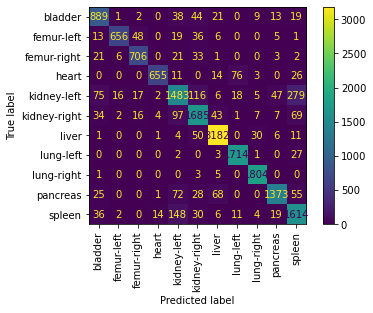

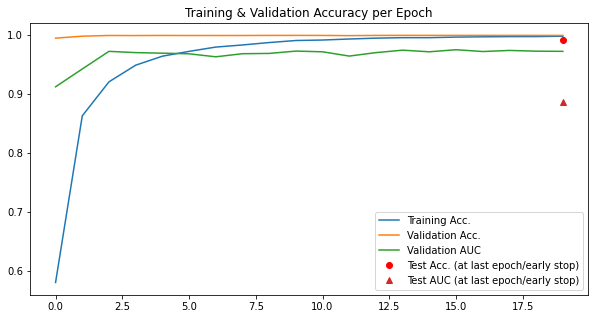

In [86]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OrgancMNIST

#### Training the Conditional VAE

In [87]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organcmnist"
base_dataset = organcmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 1, 28, 28])
Forward pass test:  True
{'loss': tensor(8405.7178, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(8405.6191, grad_fn=<MseLossBackward0>), 'KLD': tensor(-19.7764, grad_fn=<NegBackward0>)}
Loss test:  True
Cuda device:  cuda
Training phase:
Train epoch 1 -- average loss: 142.11395560396636
Validation set loss: 111.26904
Train epoch 2 -- average loss: 91.65513739483173
Validation set loss: 93.161376
Train epoch 3 -- average loss: 76.84497712590144
Validation set loss: 79.905262
Train epoch 4 -- average loss: 67.93064017427885
Validation set loss: 74.53006
Train epoch 5 -- average loss: 62.73769685246394
Validation set loss: 69.121843
Train epoch 6 -- average loss: 60.22161508413461
Validation set loss: 66.990867
Train epoch 7 -- average loss: 56.11025495793269
Validation set loss: 65.397641
Train epoch 8 -- average loss: 53.40659001277043
Validation set loss: 63

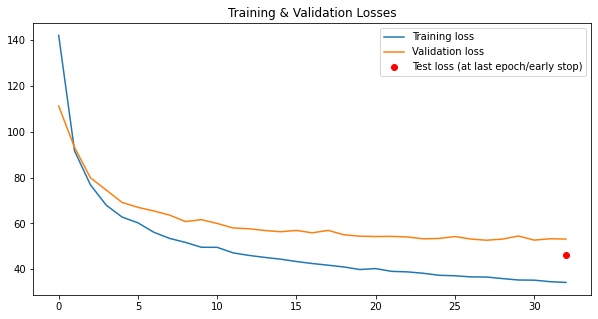

In [88]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [89]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

Number of generated images: 1300 (10% of the dataset)


2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "OrganCMNIST",
  "description": "The OrganCMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Coronal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in coronal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organcmnist.npz?download=1",
  "MD5": "0afa5834fb105f7705a7d93372119a21",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-le

100%|████████████████████████████████████████| 224/224 [00:01<00:00, 119.13it/s]


train -- accuracy: 0.41
val -- accuracy: 0.95,  AUC: 0.64
Epoch 1



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 119.38it/s]


train -- accuracy: 0.66
val -- accuracy: 0.99,  AUC: 0.81
Epoch 2



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 118.93it/s]


train -- accuracy: 0.77
val -- accuracy: 0.99,  AUC: 0.88
Epoch 3



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 119.50it/s]


train -- accuracy: 0.81
val -- accuracy: 1.0,  AUC: 0.91
Epoch 4



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 113.48it/s]


train -- accuracy: 0.84
val -- accuracy: 1.0,  AUC: 0.92
Epoch 5



100%|████████████████████████████████████████| 224/224 [00:02<00:00, 111.66it/s]


train -- accuracy: 0.86
val -- accuracy: 1.0,  AUC: 0.94
Epoch 6



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 113.04it/s]


train -- accuracy: 0.89
val -- accuracy: 1.0,  AUC: 0.93
Epoch 7



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 115.07it/s]


train -- accuracy: 0.9
val -- accuracy: 1.0,  AUC: 0.94
Epoch 8



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 118.22it/s]


train -- accuracy: 0.91
val -- accuracy: 1.0,  AUC: 0.95
Epoch 9



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 112.81it/s]


train -- accuracy: 0.92
val -- accuracy: 1.0,  AUC: 0.95
Epoch 10



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 112.63it/s]


train -- accuracy: 0.93
val -- accuracy: 1.0,  AUC: 0.96
Epoch 11



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 114.23it/s]


train -- accuracy: 0.94
val -- accuracy: 1.0,  AUC: 0.95
Epoch 12



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 115.53it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.95
Epoch 13



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 119.13it/s]


train -- accuracy: 0.96
val -- accuracy: 1.0,  AUC: 0.94
Epoch 14



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 119.68it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.95
Epoch 15



100%|████████████████████████████████████████| 224/224 [00:02<00:00, 111.08it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.95
Epoch 16



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 114.73it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.96
Epoch 17



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 116.24it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.95
Epoch 18



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 118.91it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.96
Epoch 19



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 119.93it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
test -- accuracy: 0.99,  AUC: 0.86


<Figure size 720x720 with 0 Axes>

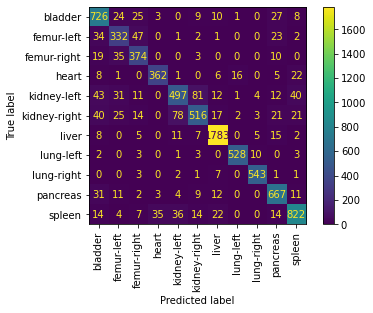

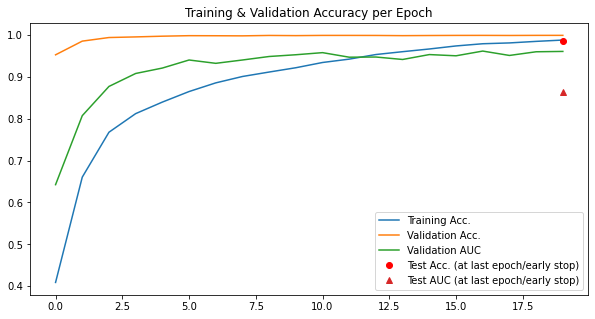

In [90]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [91]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

{
  "python_class": "OrganCMNIST",
  "description": "The OrganCMNIST is based on 3D computed tomography (CT) images from Liver Tumor Segmentation Benchmark (LiTS). It is renamed from OrganMNIST_Coronal (in MedMNIST v1) for simplicity. We use bounding-box annotations of 11 body organs from another study to obtain the organ labels. Hounsfield-Unit (HU) of the 3D images are transformed into gray-scale with an abdominal window. We crop 2D images from the center slices of the 3D bounding boxes in coronal views (planes). The images are resized into 1\u00d728\u00d728 to perform multi-class classification of 11 body organs. 115 and 16 CT scans from the source training set are used as training and validation set, respectively. The 70 CT scans from the source test set are treated as the test set.",
  "url": "https://zenodo.org/record/5208230/files/organcmnist.npz?download=1",
  "MD5": "0afa5834fb105f7705a7d93372119a21",
  "task": "multi-class",
  "label": {
    "0": "bladder",
    "1": "femur-le

100%|████████████████████████████████████████| 224/224 [00:01<00:00, 115.25it/s]


train -- accuracy: 0.35
val -- accuracy: 0.95,  AUC: 0.67
Epoch 1



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 116.73it/s]


train -- accuracy: 0.62
val -- accuracy: 0.99,  AUC: 0.84
Epoch 2



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 118.66it/s]


train -- accuracy: 0.75
val -- accuracy: 1.0,  AUC: 0.91
Epoch 3



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 119.70it/s]


train -- accuracy: 0.81
val -- accuracy: 1.0,  AUC: 0.94
Epoch 4



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 116.71it/s]


train -- accuracy: 0.85
val -- accuracy: 1.0,  AUC: 0.95
Epoch 5



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 113.93it/s]


train -- accuracy: 0.87
val -- accuracy: 1.0,  AUC: 0.94
Epoch 6



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 116.83it/s]


train -- accuracy: 0.89
val -- accuracy: 1.0,  AUC: 0.94
Epoch 7



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 120.34it/s]


train -- accuracy: 0.91
val -- accuracy: 1.0,  AUC: 0.96
Epoch 8



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 119.27it/s]


train -- accuracy: 0.92
val -- accuracy: 1.0,  AUC: 0.96
Epoch 9



100%|████████████████████████████████████████| 224/224 [00:02<00:00, 111.47it/s]


train -- accuracy: 0.93
val -- accuracy: 1.0,  AUC: 0.95
Epoch 10



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 112.90it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.95
Epoch 11



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 116.59it/s]


train -- accuracy: 0.95
val -- accuracy: 1.0,  AUC: 0.94
Epoch 12



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 119.62it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.96
Epoch 13



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 117.26it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.96
Epoch 14



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 113.39it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.95
Epoch 15



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 115.88it/s]


train -- accuracy: 0.97
val -- accuracy: 1.0,  AUC: 0.95
Epoch 16



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 119.01it/s]


train -- accuracy: 0.98
val -- accuracy: 1.0,  AUC: 0.95
Epoch 17



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 117.00it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
Epoch 18



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 116.23it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.95
Epoch 19



100%|████████████████████████████████████████| 224/224 [00:01<00:00, 115.62it/s]


train -- accuracy: 0.99
val -- accuracy: 1.0,  AUC: 0.96
test -- accuracy: 0.98,  AUC: 0.86


<Figure size 720x720 with 0 Axes>

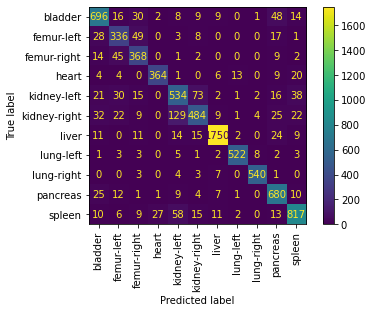

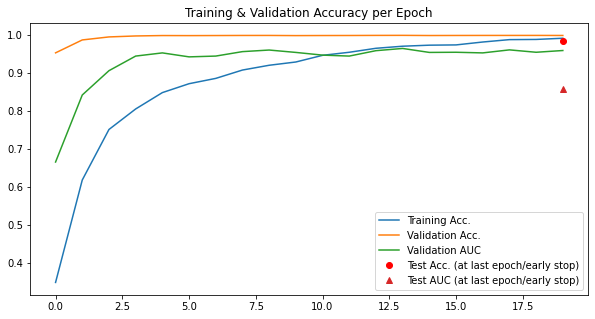

In [92]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OrgansMNIST

#### Training the Conditional VAE

In [93]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organsmnist"
base_dataset = organsmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the conditional VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader, n_channels, latent_dims,  
    n_classes=n_classes, epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="CondVAE"
)

Testing Conditional Variational Autoencoder:
Clearing CUDA Pytorch Cache
Model Output size: torch.Size([10, 1, 28, 28])
Forward pass test:  True
{'loss': tensor(8808.8926, grad_fn=<AddBackward0>), 'Reconstruction_Loss': tensor(8808.7930, grad_fn=<MseLossBackward0>), 'KLD': tensor(-19.9479, grad_fn=<NegBackward0>)}
Loss test:  True
Cuda device:  cuda
Training phase:
Train epoch 1 -- average loss: 144.58273873240225
Validation set loss: 112.667514
Train epoch 2 -- average loss: 94.03701213907819
Validation set loss: 94.924143
Train epoch 3 -- average loss: 78.15221197711173
Validation set loss: 77.870912
Train epoch 4 -- average loss: 69.94548739155533
Validation set loss: 72.940475
Train epoch 5 -- average loss: 63.9676162347561
Validation set loss: 68.335351
Train epoch 6 -- average loss: 59.18310977711397
Validation set loss: 64.595525
Train epoch 7 -- average loss: 56.390943608769724
Validation set loss: 63.243749
Train epoch 8 -- average loss: 53.302442141824336
Validation set loss:

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/CondVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condVAE_loader = generate_augmented_dataset_condVAE(
    n_channels, n_classes, latent_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

## 5. Training a Joint Variational Autoencoder 

We train a Joint Variational Autoencoder for data augmentation for each of the datasets. 

For each dataset, we then retrain the underlying baseline classifier.

In [ ]:
# Declares the Joint VAE's hyperparameters
latent_dims = 100
categorical_dims = 50
epochs = 200

### PathMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pathmnist"
base_dataset = pathmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### DermaMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "dermamnist"
base_dataset = dermamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OctMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "octmnist"
base_dataset = octmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### PneumoniaMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pneumoniamnist"
base_dataset = pneumoniamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### BreastMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "breastmnist"
base_dataset = breastmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OrganaMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organamnist"
base_dataset = organamnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 5
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OrgancMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organcmnist"
base_dataset = organcmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

### OrgansMNIST

#### Training the Joint VAE

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organsmnist"
base_dataset = organsmnist_noWRS_noGDA

# Retrieves the dataset parameters
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3]
val_loader = base_dataset[5]
test_loader = base_dataset[4]

In [ ]:
# Runs the Joint VAE
_, _, _, _ = run_encoder_pipeline(
    train_loader, val_loader, test_loader,  n_channels, 
    latent_dims, categorical_dims=categorical_dims,
    epochs=epochs, name_dataset=name_dataset, 
    output_intermediary_info=False, model_type="JointVAE"
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Fetches the generated VAE Model model to import
model_path = f"trained_models/JointVAE/{name_dataset}/"
model = [x for x in os.listdir(model_path) if x[-4:]==".pth"][-1]
model_path += model

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, jointVAE_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
jointVAE_loader = generate_augmented_dataset_jointVAE(
    n_channels, latent_dims, categorical_dims, model_path, 
    base_dataset[0], 64, test_loader, val_loader, 
    n_generated_images, weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 
clf = run_classifier_pipeline(name_dataset, info_flags, condVAE_loader)

## 6. Training a Conditional Generative Adversarial Network 

We train a Conditional Generative Adversarial Network Autoencoder for data augmentation for each of the datasets. 

For each dataset, we then retrain the underlying baseline classifier.

In [ ]:
# Declares the number of epochs and the model's latent dimensions
latent_dims = 128
epochs = 100

### PathMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pathmnist"
base_dataset = pathmnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### DermaMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "dermamnist"
base_dataset = dermamnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### OctMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "octmnist"
base_dataset = octmnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 4
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### PneumoniaMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "pneumoniamnist"
base_dataset = pneumoniamnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### BreastMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "breastmnist"
base_dataset = breastmnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### OrganaMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organamnist"
base_dataset = organamnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 5
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### OrgancMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organcmnist"
base_dataset = organcmnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

### OrgansMNIST

#### Training the Conditional GAN

In [ ]:
# Declares the dataset name and retrieves the base dataset
name_dataset = "organsmnist"
base_dataset = organsmnist_noWRS_noGDA_upscaled

# Retrieves the dataset parameters
n_classes  = len(info_flags[name_dataset][0]["label"])
n_channels = info_flags[name_dataset][0]["n_channels"]

# Retrieves the data loader
train_loader = base_dataset[3] #####################################################
val_loader = base_dataset[5]   ### OF NOTE #########################################
test_loader = base_dataset[4]  ### EVALUATE/TEST NOT IMPLEMENTED YET IN ############
                               ### TORCHFUSION AT THE TIME OF CREATION OF NOTEBOOK #
                               ### Thus the use of None below in the pipeline ######
                               #####################################################

In [ ]:
# Runs the Cond GAN
run_GAN_pipeline(
    train_loader, None, None, #val_loader, test_loader, 
    n_channels, latent_dims, n_classes,
    epochs=epochs, name_dataset=name_dataset
)

#### Generating an upgraded dataset without Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Removes saved intermediary models
model_path = f"trained_models/conditionalGAN/{name_dataset}/gen_models/"
models = [x for x in os.listdir(model_path) 
          if x[-(4+len(str(epochs))):]!=f"{epochs}.pth"]
for model in models:
    os.remove(model_path+model)
# Fetches the generated GAN Model model to import
model_path += f"gen_model_{epochs}.pth"

# Calculates the number of images to generate
percentage = 10
nb_images_in_dataset = len(base_dataset[0])
n_generated_images = int((percentage/100)*nb_images_in_dataset)
print(f"Number of generated images: {n_generated_images}",
      f"({percentage}% of the dataset)")

# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=False
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)

#### Generating an upgraded dataset with Weighted Random Sampling and training the classifier

1. <u>Generating the dataset</u>

In [ ]:
# Creates the augmented dataloader
condGAN_loader = generate_augmented_dataset_condGAN(
    n_channels, n_classes, latent_dims, model_path,
    base_dataset[0], 64, 
    test_loader, val_loader, n_generated_images,
    weighted_sampling=True
)

2. <u>Retraining the classifier and assessing changes in performance</u>

In [ ]:
# Runs the classifier again 

clf = run_classifier_pipeline(name_dataset, info_flags, condGAN_loader)